# Carga Datos
---

In [1]:
import pandas as pd

# Definir la ruta relativa al archivo de datos
# Desde la carpeta /notebooks, subimos un nivel ('..') y luego bajamos a /data/raw/
ruta_archivo = '../data/raw/train.csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(ruta_archivo)

# Análisis Exploratorio de Datos (EDA)
---

In [2]:
# Mostrar las primeras 5 filas para una inspección visual rápida
print("--- Primeras 5 filas del dataset ---")
display(df.head())

# Obtener la información básica del DataFrame
print("\n--- Información básica del DataFrame ---")
df.info()

--- Primeras 5 filas del dataset ---


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



--- Información básica del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

## Análisis Estadístico Descriptivo de SalePrice

In [3]:
# 1. Estadísticas descriptivas básicas
sale_price_stats = df['SalePrice'].describe()
print("--- Estadísticas Descriptivas de SalePrice ---")
print(sale_price_stats)

# 2. Asimetría y Curtosis
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurt()

print(f"\nAsimetría (Skewness): {skewness:.2f}")
print(f"Curtosis (Kurtosis): {kurtosis:.2f}")

--- Estadísticas Descriptivas de SalePrice ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Asimetría (Skewness): 1.88
Curtosis (Kurtosis): 6.54


### Conclusión del Análisis Estadístico

El análisis descriptivo de `SalePrice` revela información clave sobre su distribución. El precio medio de una vivienda es de **\$180,921**, mientras que la mediana se sitúa en **\$163,000**. El hecho de que la media sea notablemente superior a la mediana es un claro indicador de una **asimetría positiva**.

Esta observación se confirma con un valor de **Asimetría (Skewness) de 1.88**, lo que demuestra que la distribución tiene una larga cola a la derecha, causada por un número de viviendas con precios excepcionalmente altos. Adicionalmente, una **Curtosis de 6.54** (muy superior al valor de 3 para una distribución normal) indica que la distribución es más "puntiaguda" y posee colas más pesadas, reforzando la evidencia de la presencia de valores atípicos (outliers).

## Análisis Gráfico de SalePrice

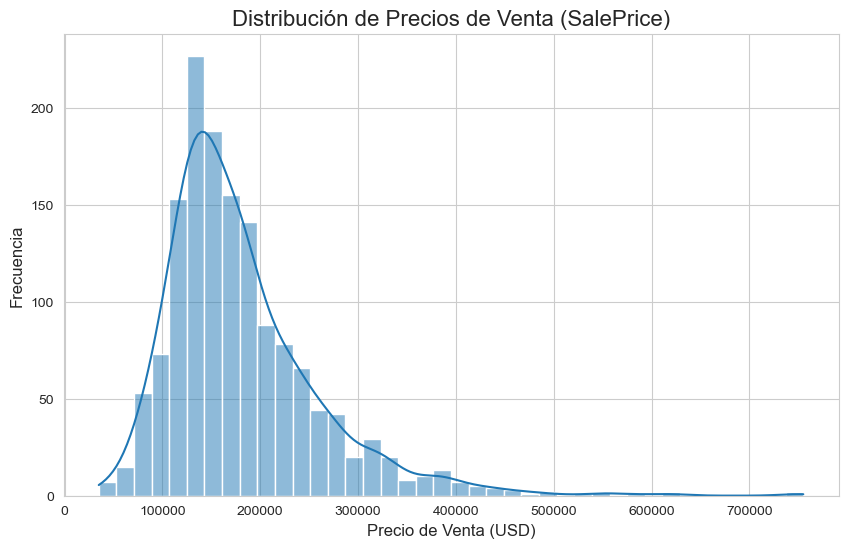

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Crear el histograma y el gráfico de densidad
sns.histplot(df['SalePrice'], kde=True, bins=40)

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución de Precios de Venta (SalePrice)', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

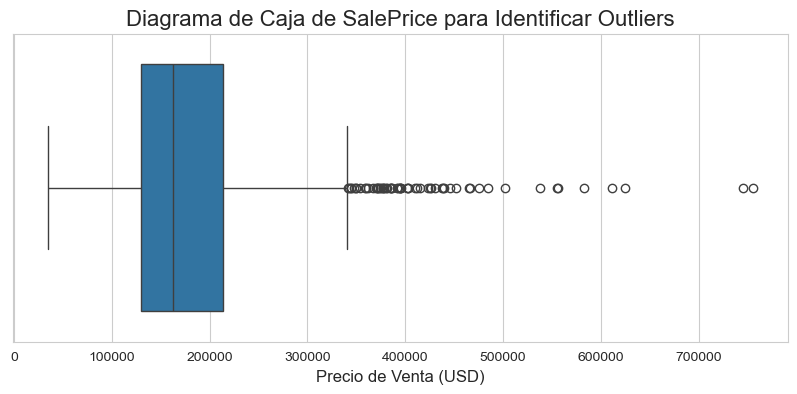

In [5]:
plt.figure(figsize=(10, 4))

# Crear el box plot
sns.boxplot(x=df['SalePrice'])

# Añadir títulos y etiquetas
plt.title('Diagrama de Caja de SalePrice para Identificar Outliers', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)

# Mostrar el gráfico
plt.show()

### Conclusión del Análisis Gráfico
Las visualizaciones de la variable `SalePrice` confirman de manera inequívoca los hallazgos del análisis estadístico.

El **histograma** muestra claramente una distribución con **asimetría positiva**. La mayor concentración de viviendas se encuentra en el rango de precios más bajos (aproximadamente entre **\$100,000** y **\$200,000**), con una frecuencia que disminuye progresivamente a medida que los precios aumentan, formando una "cola" larga hacia la derecha.

El **diagrama de caja (box plot)** complementa esta visión de forma contundente. La caja, que representa el 50% central de los datos, se sitúa en la parte baja del rango total de precios. Más importante aún, se observa una cantidad considerable de puntos individuales a la derecha de los bigotes, lo que representa visualmente los valores atípicos (**outliers**): viviendas con un precio de venta muy superior al de la gran mayoría.

En conjunto, ambos gráficos nos llevan a la misma conclusión: estamos trabajando con una variable objetivo que **no es normal** y que presenta **valores extremos** que deberán ser gestionados en fases posteriores del proyecto.

## Análisis de Correlación: Descubriendo Relaciones Clave

Ahora que comprendemos nuestra variable objetivo (`SalePrice`), el siguiente paso es identificar qué otras variables del dataset tienen una relación lineal fuerte con ella. No todas las 80 variables influirán de la misma manera en el precio de una casa. Descubrir las más influyentes nos permitirá centrar nuestros futuros análisis y esfuerzos de modelado.

### Objetivo:
Identificar las variables numéricas que están más fuertemente correlacionadas (positiva o negativamente) con `SalePrice`.

### Herramienta:
Para ello, vamos a calcular la **matriz de correlación** de todas las variables numéricas. Luego, visualizaremos esta matriz usando un **mapa de calor (heatmap)**. El mapa de calor es una herramienta gráfica excepcional que utiliza colores para representar la fuerza de la correlación, permitiéndonos detectar patrones de un solo vistazo.

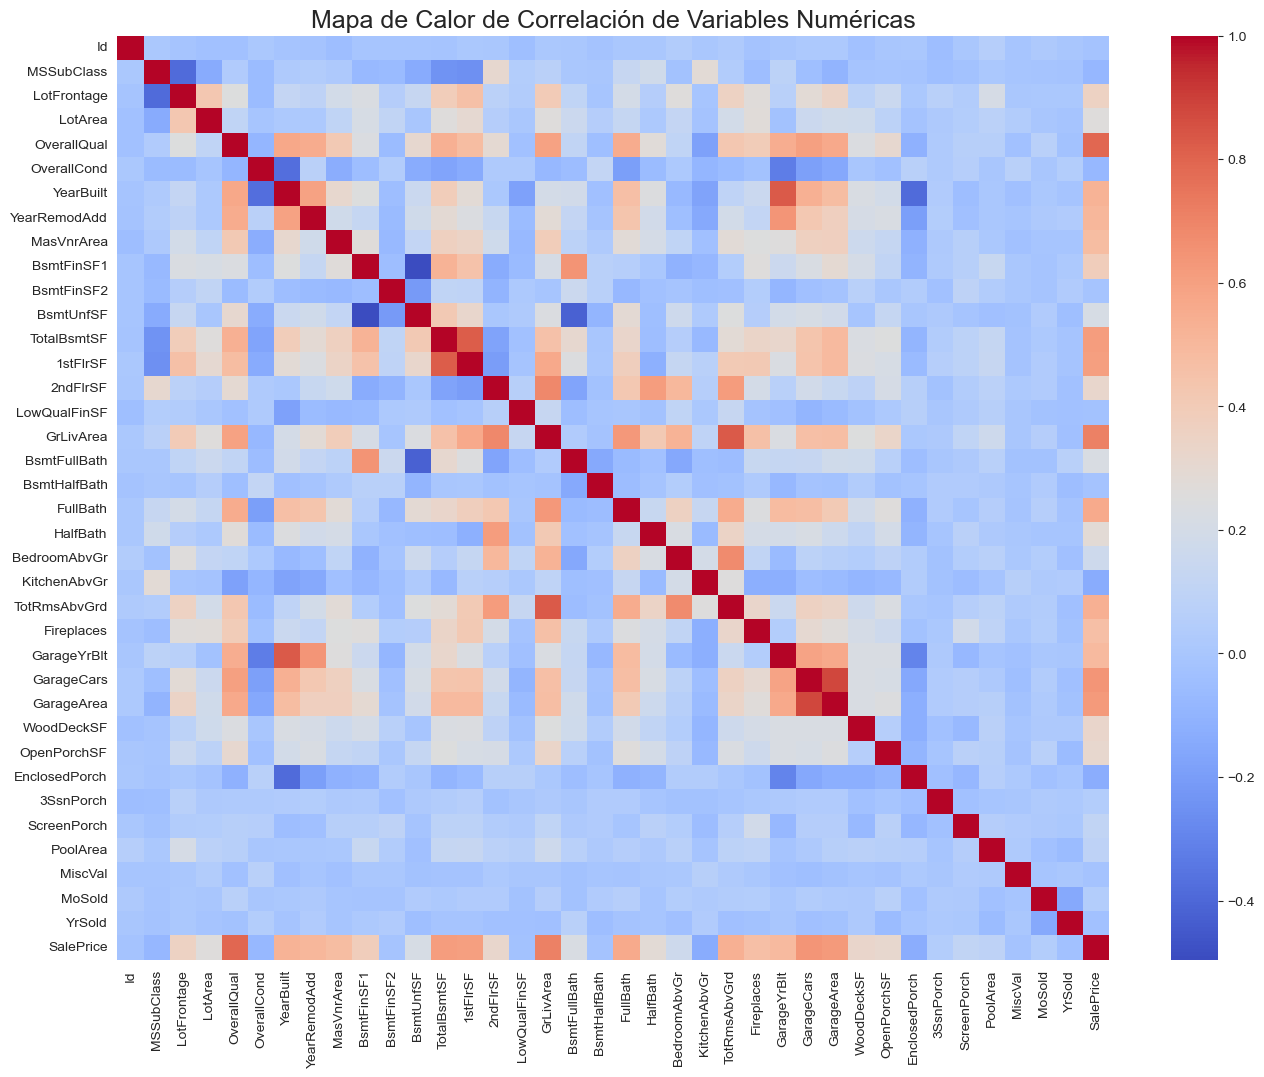

In [6]:
import numpy as np

# 1. Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df.select_dtypes(include=np.number)

# 2. Calcular la matriz de correlación sobre el DataFrame numérico
correlation_matrix = numeric_df.corr()

# 3. Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(16, 12))

# 4. Generar el mapa de calor
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)

# 5. Añadir un título
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=18)

# 6. Mostrar el gráfico
plt.show()

## Análisis del Mapa de Calor y Principales Hallazgos

Este mapa de calor nos proporciona una visión panorámica de las relaciones lineales entre todas las variables numéricas. Nuestro foco principal está en la última fila (o columna), `SalePrice`, para identificar qué variables tienen el mayor impacto en el precio de venta.

Los hallazgos clave son:

### Fuertes Correlaciones Positivas con `SalePrice`:
Observamos varios cuadrados de color rojo intenso en la fila de `SalePrice`, lo que indica una fuerte correlación positiva. Las variables más importantes son:
* **`OverallQual` (Calidad General):** Es, con diferencia, la variable con la correlación positiva más fuerte. A mayor calidad de los materiales y acabados, mayor es el precio de venta.
* **`GrLivArea` (Área habitable sobre rasante):** Cuantos más metros cuadrados habitables tiene la casa, más cara es. Una relación muy intuitiva.
* **`GarageCars` y `GarageArea` (Capacidad y Área del Garaje):** Ambas están fuertemente correlacionadas con el precio. Casas con garajes más grandes y para más coches tienden a ser más caras.
* **`TotalBsmtSF` (Área Total del Sótano) y `1stFlrSF` (Área del Primer Piso):** El tamaño de la planta baja y del sótano también son predictores muy importantes del precio.

### Identificación de Multicolinealidad:
El mapa también revela fuertes correlaciones entre las propias variables predictoras, un fenómeno llamado **multicolinealidad**. Esto es importante tenerlo en cuenta para el futuro modelado. Los ejemplos más claros son:
* **`GarageCars` y `GarageArea`:** El cuadrado donde se cruzan es de un rojo muy intenso. Es lógico: un garaje para más coches suele ser más grande. Para un modelo, usar ambas variables podría ser redundante.
* **`TotalBsmtSF` y `1stFlrSF`:** También están muy correlacionadas.
* **`GrLivArea` y `TotRmsAbvGrd` (Total de habitaciones):** Más habitaciones suelen implicar más área habitable.

### Variables con Poca Influencia:
Muchas variables tienen colores muy cercanos al blanco, lo que indica una correlación cercana a cero (ej. `MSSubClass`, `MoSold`). Estas, a priori, parecen tener poca o ninguna relación lineal con el precio de venta.

## Análisis Visual Bivariante de las Variables de Mayor Impacto

### Objetivos y Metodología

Tras la identificación de las variables numéricas con mayor coeficiente de correlación de Pearson respecto a `SalePrice` mediante el mapa de calor, se procede a una inspección visual detallada de dichas relaciones. El objetivo de esta fase es validar y caracterizar la naturaleza de estas correlaciones, yendo más allá de la mera cuantificación lineal. Un análisis gráfico permite identificar patrones no lineales, heterocedasticidad y la presencia de posibles valores atípicos (**outliers**) que no son evidentes únicamente a través del coeficiente de correlación.

Para este fin, se han seleccionado las dos variables con la correlación positiva más elevada:

* `OverallQual`: Una variable de tipo ordinal que representa la calidad general de la vivienda.
* `GrLivArea`: Una variable continua que indica el área habitable sobre el nivel del suelo.

La metodología de visualización se ha adaptado a la naturaleza de cada variable:

* Para la relación `SalePrice` vs. `OverallQual`, se empleará un **diagrama de cajas (box plot)**. Esta técnica es idónea para visualizar la distribución de una variable continua (`SalePrice`) a través de las diferentes categorías de una variable ordinal (`OverallQual`), permitiendo comparar medianas, rangos intercuartílicos y la dispersión de precios para cada nivel de calidad.

* Para la relación `SalePrice` vs. `GrLivArea`, se utilizará un **diagrama de dispersión (scatter plot)**, complementado con una línea de regresión. Este gráfico es el estándar para examinar la relación entre dos variables continuas, permitiendo evaluar la linealidad de la tendencia y la dispersión de los datos alrededor de la misma.

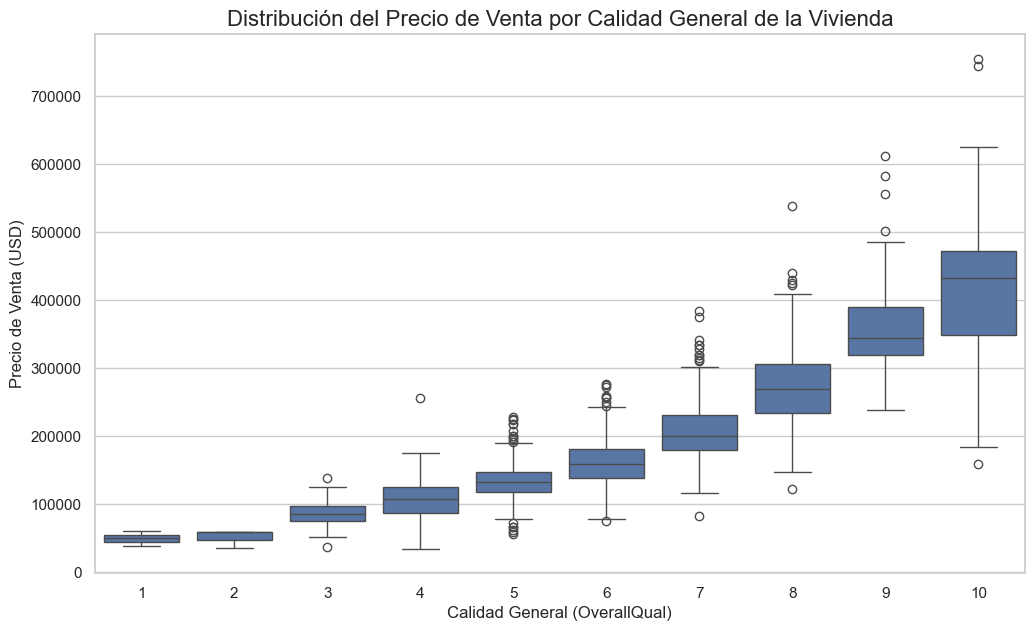

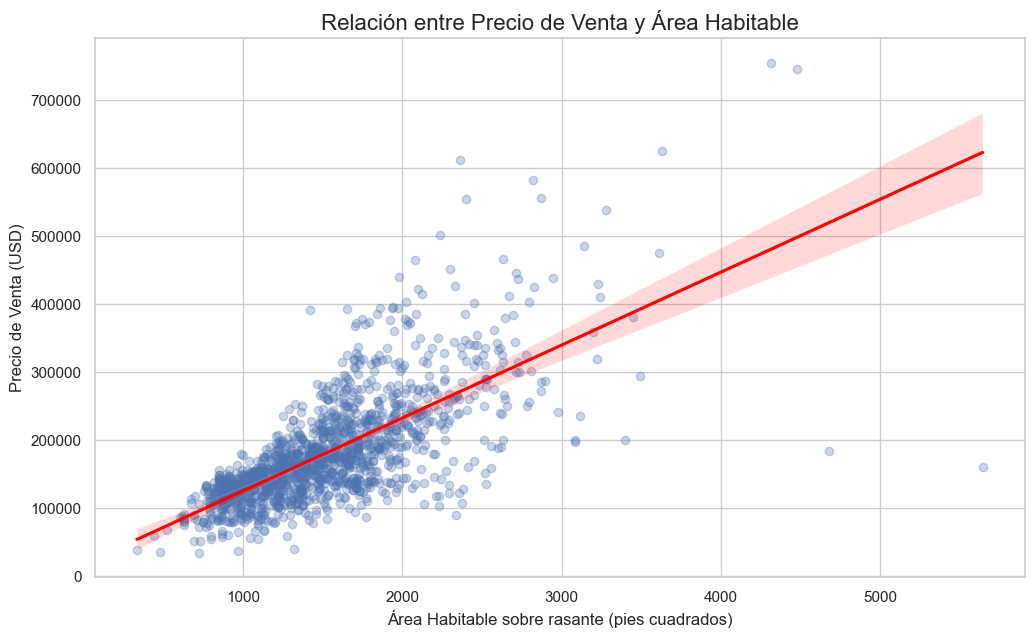

In [7]:


# Configuración del estilo visual para los gráficos
sns.set_theme(style="whitegrid")

# --- Gráfico 1: Relación SalePrice vs. OverallQual (Diagrama de Cajas) ---

plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

plt.title('Distribución del Precio de Venta por Calidad General de la Vivienda', fontsize=16)
plt.xlabel('Calidad General (OverallQual)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)

plt.savefig('calidad_vs_precio.png', dpi=300, bbox_inches='tight')
plt.show()


# --- Gráfico 2: Relación SalePrice vs. GrLivArea (Diagrama de Dispersión) ---

plt.figure(figsize=(12, 7))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, 
            scatter_kws={'alpha':0.3}, # Ajuste de transparencia para visualizar densidad
            line_kws={'color':'red'}) # Superposición de la línea de regresión lineal

plt.title('Relación entre Precio de Venta y Área Habitable', fontsize=16)
plt.xlabel('Área Habitable sobre rasante (pies cuadrados)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)

plt.savefig('area_vs_precio.png', dpi=300, bbox_inches='tight')
plt.show()

## Análisis de Resultados Visuales

La inspección de los gráficos generados permite confirmar y profundizar en la comprensión de las relaciones entre las variables predictoras más correlacionadas y el precio de venta.

### Relación entre `SalePrice` y `OverallQual`

El diagrama de cajas revela una **relación monotónica positiva** muy fuerte entre la calidad general de la vivienda y su precio de venta. Se observa que a medida que la categoría de `OverallQual` aumenta, la mediana del `SalePrice`, representada by la línea central de cada caja, se incrementa de forma consistente.

Adicionalmente, el gráfico evidencia un patrón de **heterocedasticidad**: la dispersión de los precios de venta (representada por la altura de las cajas y la longitud de los bigotes) aumenta a medida que se incrementa la calidad. Esto sugiere que, si bien las viviendas de baja calidad tienen precios más homogéneos, existe una variabilidad de precios considerablemente mayor entre las viviendas de alta calidad.

### Relación entre `SalePrice` y `GrLivArea`

El diagrama de dispersión confirma la existencia de una **relación lineal positiva y robusta** entre el área habitable y el precio de venta. La línea de regresión superpuesta muestra una clara pendiente ascendente, indicando que a mayor área, mayor es el precio esperado.

No obstante, se identifican dos aspectos cruciales:

* **Heterocedasticidad**: Al igual que en el caso anterior, la dispersión de los puntos aumenta a medida que `GrLivArea` se incrementa. Los precios para viviendas de menor tamaño se encuentran más concentrados, mientras que para viviendas de mayor tamaño la variabilidad de precios es mucho más pronunciada.
* **Posibles Outliers Influyentes**: Se destacan dos observaciones en la esquina inferior derecha del gráfico. Estos puntos corresponden a viviendas con un área habitable (`GrLivArea`) excepcionalmente grande (> 4000 pies cuadrados) pero con un precio de venta comparativamente bajo. Estos datos atípicos son de especial interés, ya que podrían ejercer una influencia desproporcionada en el ajuste de un modelo de regresión lineal y suponen una desviación del patrón general.

### Conclusión Parcial

El análisis bivariante visual no solo valida la alta correlación de `OverallQual` y `GrLivArea` con `SalePrice`, sino que también revela complejidades importantes en estas relaciones, como la **heterocedasticidad** y la presencia de **outliers significativos**. Estos hallazgos serán fundamentales durante la fase de pre-procesamiento de datos y la selección del modelo, ya que sugieren que un modelo lineal simple podría no capturar adecuadamente toda la estructura de los datos sin realizar transformaciones o un tratamiento específico de los valores atípicos.

## Análisis de Variables Categóricas: Influencia del Vecindario

### Objetivos y Metodología

Habiendo caracterizado las relaciones de las principales variables numéricas con `SalePrice`, el análisis exploratorio se extiende ahora a las variables categóricas. El objetivo es determinar cómo la pertenencia a una categoría específica influye en la distribución del precio de venta. La variable `Neighborhood` (vecindario) ha sido seleccionada para este análisis inicial, dada su alta relevancia teórica en la valoración de bienes inmuebles.

La metodología consistirá en visualizar la distribución de `SalePrice` para cada una de las categorías de `Neighborhood` mediante un **diagrama de cajas (box plot)**. Para facilitar la interpretación y la comparación visual, los vecindarios se ordenarán en el eje horizontal según su mediana de precio de venta, de menor a mayor. Esta ordenación permitirá identificar de forma clara y sistemática qué vecindarios se asocian a los precios más bajos, medios y altos, así como comparar la dispersión de precios dentro de cada uno.

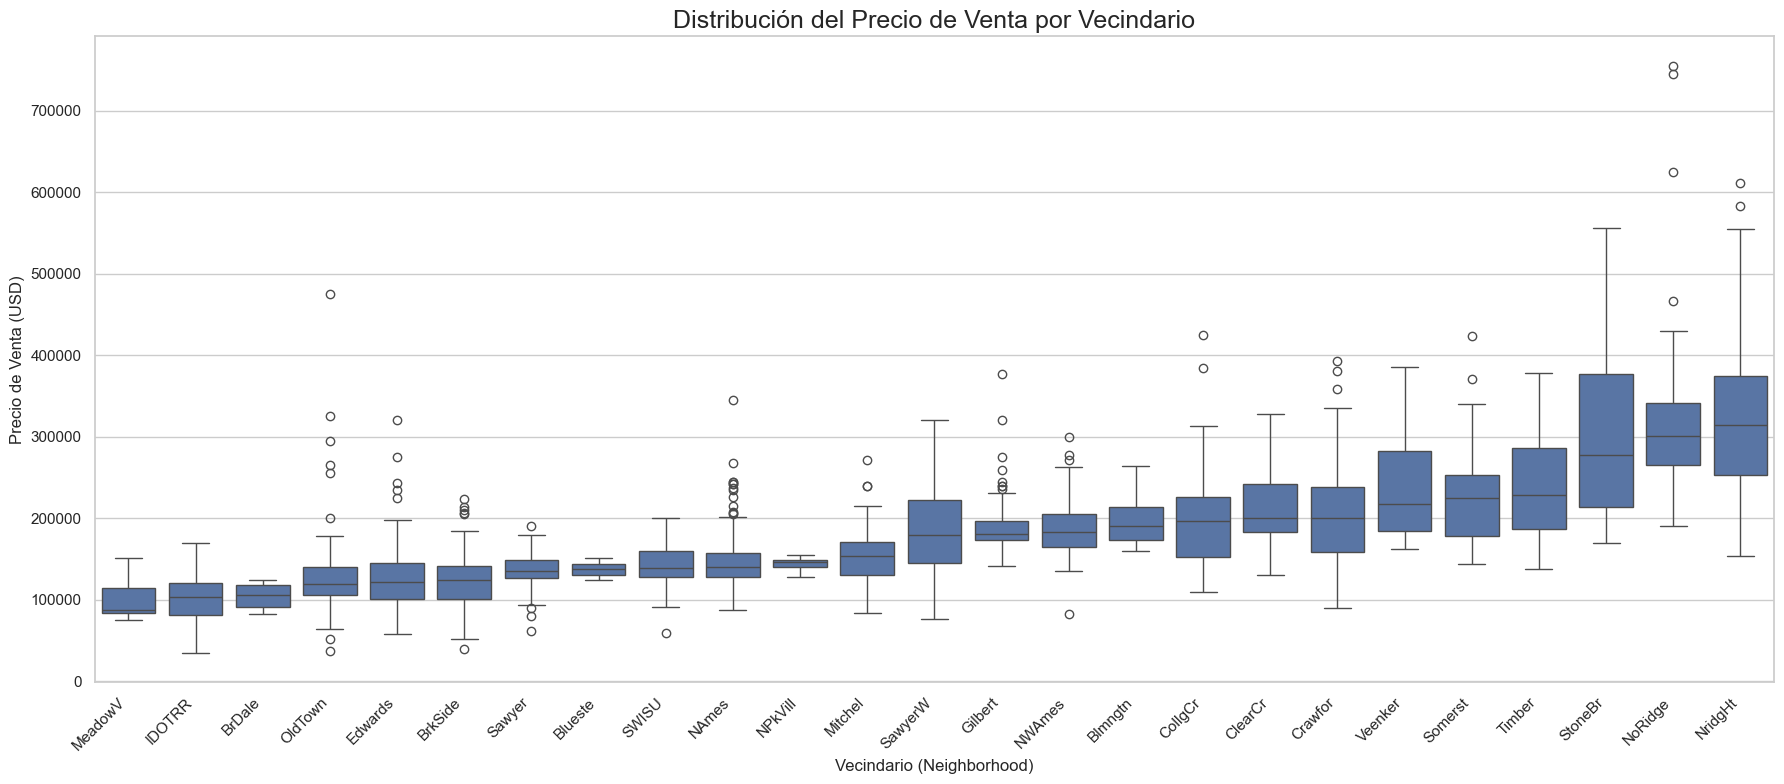

In [8]:

sns.set_theme(style="whitegrid")

# 1. Determinar el orden de los vecindarios según la mediana del precio de venta
neighborhood_order = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index

# 2. Configurar la figura para el gráfico
# Se utiliza un tamaño más ancho para acomodar todos los vecindarios
plt.figure(figsize=(18, 8))

# 3. Generar el diagrama de cajas
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=neighborhood_order)

# 4. Ajustar etiquetas para mejorar la legibilidad
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X
plt.title('Distribución del Precio de Venta por Vecindario', fontsize=18)
plt.xlabel('Vecindario (Neighborhood)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)
plt.tight_layout() # Ajusta el gráfico para que todo encaje correctamente

# 5. Guardar y mostrar el gráfico
plt.savefig('vecindario_vs_precio.png', dpi=300)
plt.show()

## Análisis de Resultados: `SalePrice` por `Neighborhood`

La visualización de la distribución de `SalePrice` a través de las diferentes categorías de `Neighborhood` confirma de manera contundente la hipótesis de que la ubicación es un factor determinante en el precio de la vivienda. El ordenamiento de los vecindarios según su mediana de precio revela una clara y progresiva escalera de valorización.

Del análisis del gráfico se desprenden las siguientes conclusiones clave:

* **Fuerte poder predictivo**: La variación en los precios medianos entre los vecindarios más económicos (ej. `MeadowV`, `BrDale`) y los más costosos (ej. `NridgHt`, `NoRidge`, `StoneBr`) es sustancial. Esta marcada diferencia subraya el alto poder predictivo de esta variable categórica.

* **Segmentación de vecindarios**: El gráfico permite una clara segmentación de los vecindarios en, al menos, tres niveles: de precio bajo, medio y alto. Esta agrupación podría ser de gran utilidad en la fase de ingeniería de características (*feature engineering*), donde los vecindarios podrían ser agrupados en "tiers" para simplificar el modelo.

* **Variabilidad en la dispersión de precios**: Se observa una notable diferencia en la dispersión de precios (rango intercuartílico) entre los distintos vecindarios. Localidades como `StoneBr` y `NridgHt` no solo presentan los precios medianos más altos, sino también una gran variabilidad, lo que sugiere una mayor heterogeneidad en el tipo y tamaño de las viviendas dentro de esos vecindarios. Por el contrario, los vecindarios más económicos tienden a presentar precios más homogéneos.

### Conclusión Parcial

El análisis confirma que la variable `Neighborhood` es un predictor fundamental de `SalePrice`. Cualquier modelo predictivo que se desarrolle deberá incorporar esta información de manera efectiva para alcanzar un rendimiento óptimo.

## Diagnóstico de Calidad de Datos: Análisis de Valores Nulos

### Objetivos y Metodología

Una fase fundamental del Análisis Exploratorio de Datos consiste en la evaluación de la completitud del dataset. El resumen inicial (`.info()`) ya indicaba la presencia de valores nulos en varias columnas. El objetivo de este apartado es cuantificar sistemáticamente la magnitud de estos datos faltantes para cada variable y presentar los resultados de una manera que facilite la toma de decisiones en la fase de pre-procesamiento.

La metodología a seguir será:

* **Calcular el porcentaje de valores nulos** para cada una de las columnas del dataset.
* **Filtrar y seleccionar** únicamente aquellas columnas que presenten un porcentaje de datos faltantes superior a cero.
* **Visualizar estos resultados** en un gráfico de barras ordenado de forma descendente. Esta representación visual permitirá identificar de manera inmediata las variables con mayor incidencia de valores nulos, las cuales requerirán una estrategia de imputación o eliminación en la siguiente etapa del proyecto.

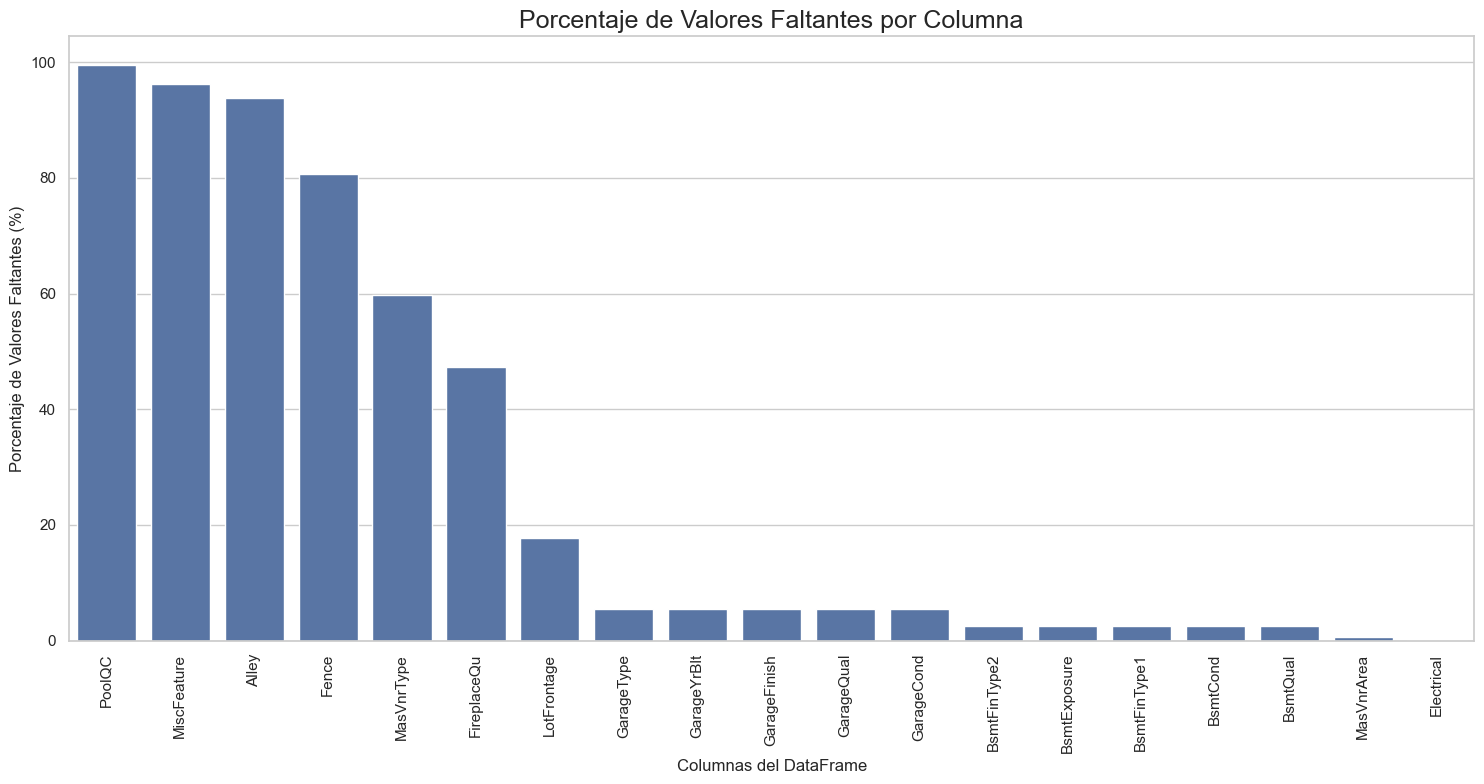

In [9]:

# 1. Calcular el porcentaje de valores nulos por columna
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / len(df)) * 100

# 2. Ordenar los resultados de mayor a menor
missing_percentage.sort_values(ascending=False, inplace=True)

# 3. Configurar y generar el gráfico
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)

# 4. Ajustar títulos y etiquetas
plt.xticks(rotation=90) # Rotar etiquetas para que no se solapen
plt.title('Porcentaje de Valores Faltantes por Columna', fontsize=18)
plt.xlabel('Columnas del DataFrame', fontsize=12)
plt.ylabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
plt.tight_layout()

# 5. Guardar y mostrar el gráfico
plt.savefig('valores_faltantes.png', dpi=300)
plt.show()

## Análisis de Resultados: Valores Faltantes

El análisis cuantitativo de valores nulos revela que, si bien una porción significativa de las variables del dataset está afectada, la naturaleza de estos datos faltantes no es uniforme. Es posible clasificar las variables en tres grupos distintos según la proporción y el significado de sus valores nulos.

### Grupo 1: Alta Proporción de Nulos (>80%)
Las variables `PoolQC`, `MiscFeature`, `Alley` y `Fence` presentan un porcentaje de ausencia superior al 80%. Sin embargo, al consultar el fichero `data_description.txt`, se constata que en estos casos el valor `NaN` no representa una omisión de información, sino una categoría en sí misma. Por ejemplo, un valor nulo en `PoolQC` significa que la vivienda **no tiene piscina**. Por lo tanto, estos no son datos "faltantes", sino datos con significado que deberán ser tratados como una categoría específica (ej. "None") en la fase de pre-procesamiento.

### Grupo 2: Proporción Moderada de Nulos (5-50%)
En este grupo destacan `FireplaceQu` (Calidad de la chimenea) y `LotFrontage` (Pies lineales de calle conectados a la propiedad).
* Al igual que en el grupo anterior, un `NaN` en `FireplaceQu` indica la **ausencia de chimenea**.
* En cambio, los valores faltantes en `LotFrontage` parecen ser datos **genuinamente ausentes** que requerirán una estrategia de imputación (p. ej., utilizando la mediana del vecindario).

### Grupo 3: Baja Proporción de Nulos (<5%)
Este grupo incluye un conjunto de variables relacionadas con el garaje (`Garage...`), el sótano (`Bsmt...`), el revestimiento de mampostería (`MasVnr...`) y una única entrada en `Electrical`. En la mayoría de estos casos (garaje, sótano, revestimiento), el valor `NaN` también indica la ausencia del elemento constructivo. Las pocas entradas restantes pueden ser tratadas con técnicas de imputación simples (la moda o la mediana) sin introducir un sesgo significativo en el dataset.

## Conclusión Final del Análisis Exploratorio

Hemos completado un ciclo completo de Análisis Exploratorio de Datos. A lo largo de este proceso, hemos transformado un conjunto de datos crudo en un conjunto de hallazgos accionables que guiarán las siguientes etapas del proyecto.

* **Variable Objetivo**: Hemos determinado que `SalePrice` no sigue una distribución normal y presenta outliers, lo que sugiere la necesidad de una transformación (ej. logarítmica) para el modelado.
* **Predictores Clave**: Identificamos las variables con mayor poder predictivo, destacando la fuerte influencia de `OverallQual` (calidad), `GrLivArea` (tamaño), y `Neighborhood` (ubicación).
* **Calidad de Datos**: Disponemos de un mapa claro sobre los datos faltantes, entendiendo que la mayoría de los `NaN` son, en realidad, una categoría informativa que debe ser tratada como tal.

# Preprocesamiento e Ingeniería de Características
---

En esta fase del proyecto, se procederá a la preparación y transformación del conjunto de datos de entrenamiento. El objetivo principal es convertir los datos brutos en un formato limpio, estructurado y optimizado para el entrenamiento de modelos de machine learning. Un preprocesamiento riguroso es un pilar fundamental para maximizar el rendimiento predictivo y asegurar la robustez del modelo final.

Las tareas a desarrollar en esta sección se han definido a partir de los hallazgos del Análisis Exploratorio de Datos (EDA) y siguen una secuencia lógica:

1.  **Transformación de la Variable Objetivo:** Se corregirá la asimetría positiva de la variable `SalePrice` para alinearla con los supuestos de normalidad de los modelos de regresión.
2.  **Tratamiento de Valores Nulos:** Se implementará una estrategia de imputación diferenciada. Primero, se abordarán los nulos que indican la ausencia de una característica (ej. `PoolQC`) y, a continuación, los que representan datos genuinamente faltantes (ej. `LotFrontage`).
3.  **Gestión de Outliers:** Se identificarán y eliminarán registros atípicos que puedan ejercer una influencia desproporcionada en el ajuste del modelo, como los detectados en la variable `GrLivArea`.
4.  **Ingeniería de Características (Feature Engineering):** Se crearán nuevas variables a partir de las existentes con el fin de capturar relaciones más complejas y aportar mayor poder predictivo.
5.  **Codificación de Variables Categóricas:** Se convertirán las variables no numéricas a un formato interpretable por los algoritmos, aplicando técnicas como *Ordinal Encoding* o *One-Hot Encoding* según la naturaleza de cada variable.
6.  **Escalado de Variables Numéricas:** Finalmente, se estandarizarán las características numéricas para asegurar que todas contribuyan de forma equitativa al proceso de aprendizaje, evitando sesgos por diferencias de escala.

# 1. Transformación de la Variable Objetivo (SalePrice)

El análisis de la variable objetivo, `SalePrice`, es un punto de partida fundamental en la fase de preprocesamiento. El Análisis Exploratorio de Datos (EDA) previo ha evidenciado que la distribución de `SalePrice` presenta una notable **asimetría positiva** (right-skewness). Esta característica es común en variables de naturaleza económica, como precios o ingresos.

La presencia de asimetría en la variable dependiente puede contravenir los supuestos de normalidad en los que se basan múltiples algoritmos de regresión, especialmente los modelos lineales. La violación de este supuesto puede afectar negativamente la capacidad de generalización y la precisión del modelo predictivo.

Para mitigar este efecto, se procederá a aplicar una **transformación logarítmica** a la variable `SalePrice`. Esta técnica es estándar para la reducción de la asimetría y la estabilización de la varianza. Concretamente, se utilizará la función `numpy.log1p`, que calcula el logaritmo natural de `1 + x`. Esta función es numéricamente estable y gestiona adecuadamente eventuales valores de cero. El objetivo es obtener una distribución de la variable objetivo que se aproxime en mayor medida a una distribución Gaussiana.

Gráfico 'distribucion_saleprice_antes.png' guardado.


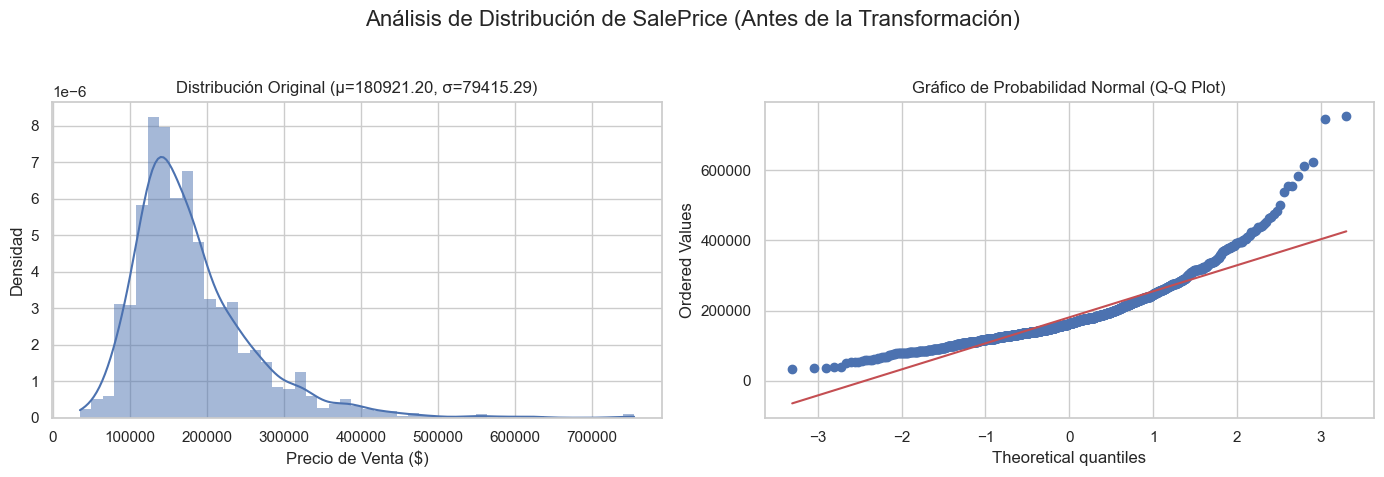

Gráfico 'distribucion_saleprice_despues.png' guardado.


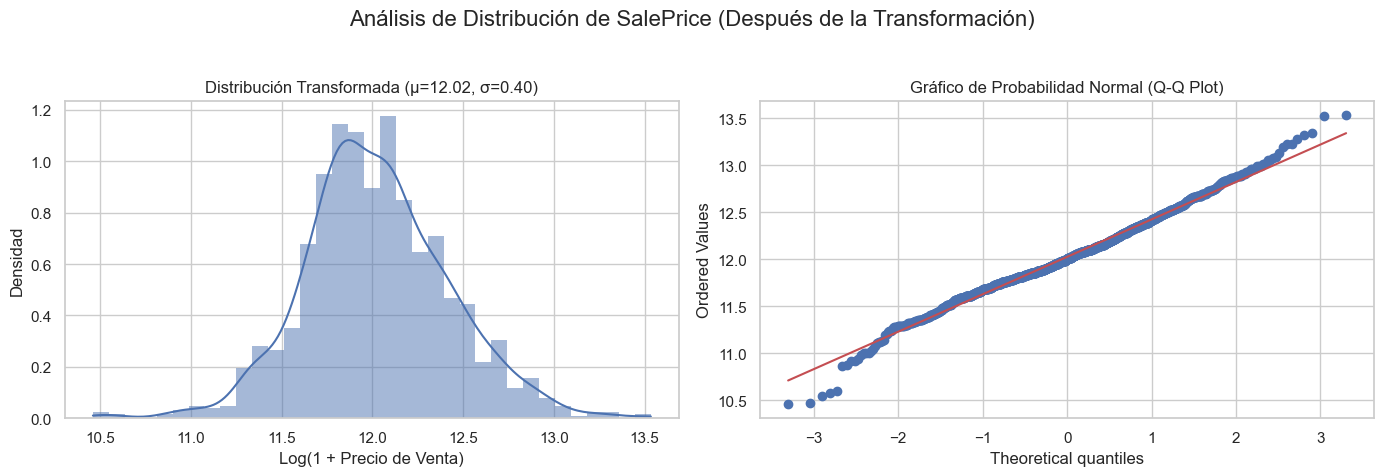

In [10]:
from scipy import stats
from scipy.stats import norm

# Se crea una copia del DF para el preprocesamiento a fin de no alterar el original.
df_train = df.copy()

# --- Fase 1: Visualización de la distribución original de SalePrice ---

# Se genera un gráfico combinado para evaluar la distribución antes de la transformación.
# Incluye un histograma con una curva de densidad y un gráfico de probabilidad normal (Q-Q Plot).
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, stat="density", linewidth=0)
mu, sigma = norm.fit(df_train['SalePrice'])
plt.title(f'Distribución Original (μ={mu:.2f}, σ={sigma:.2f})')
plt.xlabel("Precio de Venta ($)")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot)")

plt.suptitle("Análisis de Distribución de SalePrice (Antes de la Transformación)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura en un archivo
plt.savefig('distribucion_saleprice_antes.png')
print("Gráfico 'distribucion_saleprice_antes.png' guardado.")

plt.show()


# --- Fase 2: Aplicación de la transformación logarítmica ---

# Se aplica la función log1p de NumPy para transformar la columna 'SalePrice'.
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


# --- Fase 3: Visualización de la distribución transformada de SalePrice ---

# Se repite el proceso de visualización para la variable ya transformada.
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, stat="density", linewidth=0)
mu_log, sigma_log = norm.fit(df_train['SalePrice'])
plt.title(f'Distribución Transformada (μ={mu_log:.2f}, σ={sigma_log:.2f})')
plt.xlabel("Log(1 + Precio de Venta)")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot)")

plt.suptitle("Análisis de Distribución de SalePrice (Después de la Transformación)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura en un archivo
plt.savefig('distribucion_saleprice_despues.png')
print("Gráfico 'distribucion_saleprice_despues.png' guardado.")

plt.show()

### Conclusión del Paso 1: Análisis de Resultados

Tras la ejecución del código, se han generado dos visualizaciones que comparan la distribución de la variable `SalePrice` antes y después de la aplicación de la transformación logarítmica.

1.  **Estado Inicial:** El primer gráfico confirma los hallazgos del EDA. El histograma muestra una clara **asimetría positiva**, con una cola larga hacia los valores altos. El gráfico de probabilidad normal (Q-Q Plot) corrobora esta observación, ya que los cuantiles empíricos se desvían sistemáticamente de la línea de referencia teórica, especialmente en los extremos. Esta distribución no es adecuada para modelos que asumen normalidad en los residuos.

2.  **Estado Posterior:** El segundo gráfico evidencia el éxito de la transformación. La distribución de `log(1 + SalePrice)` es visiblemente más **simétrica y se aproxima de manera notable a una distribución Gaussiana**. El histograma adopta la forma de campana característica, y los puntos en el Q-Q Plot se alinean casi perfectamente sobre la línea diagonal.

**En conclusión, la transformación logarítmica ha sido una medida efectiva para corregir el sesgo de la variable objetivo `SalePrice`.** Se ha obtenido una variable transformada con propiedades estadísticas más deseables, lo que previsiblemente mejorará la robustez y el rendimiento de los modelos de regresión que se entrenarán posteriormente.

# 2.1 Tratamiento de Valores Nulos (Tipo 1 - Ausencia)

Una vez normalizada la variable objetivo, el siguiente paso consiste en abordar la gestión de los valores nulos (`NaN`). Un análisis detallado de `data_description.txt` revela que una proporción significativa de estos valores no son ausencias de datos en el sentido estricto, sino que se utilizan para denotar la **inexistencia de una característica** en la propiedad.

Por ejemplo:
-   Un valor `NaN` en la variable `PoolQC` (Calidad de la Piscina) indica que la vivienda **no posee piscina**.
-   Un `NaN` en `GarageType` (Tipo de Garaje) significa que la propiedad **carece de garaje**.

Interpretar estos `NaN` como datos faltantes e imputarlos con medidas de tendencia central (media, mediana) sería conceptualmente incorrecto y podría introducir un sesgo significativo en el modelo. Por lo tanto, la estrategia a seguir es transformar estos valores para que representen explícitamente la ausencia de la característica.

La metodología de imputación será la siguiente:
1.  Para las **variables categóricas** (`Alley`, `BsmtQual`, `FireplaceQu`, etc.), los valores `NaN` se sustituirán por la cadena de texto **`'None'`**. Esto crea una nueva categoría que el modelo puede interpretar.
2.  Para las **variables numéricas** asociadas a estas características (`GarageArea`, `MasVnrArea`, etc.), los `NaN` se reemplazarán por el valor **`0`**, lo cual es coherente con la ausencia de la característica (e.g., área del garaje es cero si no hay garaje).

In [11]:
# --- Definición de las columnas a tratar ---

# Listado de variables categóricas donde NaN denota ausencia.
cols_impute_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
    'MasVnrType'
]

# Listado de variables numéricas donde NaN denota ausencia (valor cero).
cols_impute_zero = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# --- Aplicación del proceso de imputación ---

print("Iniciando la imputación de valores nulos que representan ausencia...")

# Se itera sobre las listas y se aplica el método fillna() con el valor correspondiente.
for col in cols_impute_none:
    df_train[col] = df_train[col].fillna('None')

for col in cols_impute_zero:
    df_train[col] = df_train[col].fillna(0)
    
print("Proceso de imputación finalizado.")

# --- Verificación de la correcta ejecución ---

# Se comprueba que no queden valores nulos en las columnas procesadas.
nulos_restantes = df_train[cols_impute_none + cols_impute_zero].isnull().sum().sum()

if nulos_restantes == 0:
    print("\nVerificación exitosa: No se han encontrado valores nulos en las columnas tratadas.")
else:
    print(f"\nAdvertencia: Se han detectado {nulos_restantes} valores nulos restantes en las columnas procesadas.")

# Mostrar el número de valores nulos por columna en el resto del dataframe
print("\nResumen de valores nulos restantes en el dataset:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Iniciando la imputación de valores nulos que representan ausencia...
Proceso de imputación finalizado.

Verificación exitosa: No se han encontrado valores nulos en las columnas tratadas.

Resumen de valores nulos restantes en el dataset:
LotFrontage    259
Electrical       1
dtype: int64


### Conclusión del Paso 2.1: Análisis de Resultados

La ejecución del código confirma que la imputación de valores nulos de "Tipo 1" se ha completado con éxito. Las columnas en las que `NaN` representaba la ausencia de una característica ya no contienen valores nulos.

El resumen final de valores nulos restantes nos muestra `LotFrontage` y `Electrical`. Estos son casos de datos genuinamente faltantes ("Tipo 2") que requieren una estrategia de imputación diferente, la cual se abordará en el siguiente paso.

# 2.2. Tratamiento de Valores Nulos (Tipo 2 - Genuinos)

Tras haber gestionado los nulos que representaban ausencia, nos centramos ahora en los valores genuinamente faltantes. El análisis previo ha identificado dos variables afectadas: `LotFrontage` y `Electrical`.

**Estrategia de Imputación:**

1.  **`LotFrontage` (Fachada en metros lineales):** Es razonable suponer que las propiedades dentro de un mismo vecindario (`Neighborhood`) tienden a tener una fachada de parcela similar. Por lo tanto, se imputarán los valores faltantes de `LotFrontage` utilizando la **mediana** de esta variable, agrupada por vecindario. Se elige la mediana en lugar de la media por su mayor robustez frente a valores atípicos.

2.  **`Electrical` (Sistema eléctrico):** Esta variable presenta un único valor faltante. En este escenario, la estrategia más pragmática y estadísticamente sólida es imputar dicho valor con la **moda**, es decir, el tipo de sistema eléctrico más frecuente en el conjunto de datos.

In [12]:
# --- Fase 1: Imputación de 'LotFrontage' ---

# Se calcula la mediana de 'LotFrontage' para cada 'Neighborhood' y se utiliza para rellenar los nulos.
# El método .transform() es ideal aquí, ya que devuelve una serie con el mismo índice que df_train.
print("Imputando valores nulos en 'LotFrontage'...")
lotfrontage_imputer = df_train.groupby('Neighborhood')['LotFrontage'].transform('median')
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(lotfrontage_imputer)


# --- Fase 2: Imputación de 'Electrical' ---

# Se calcula la moda (valor más frecuente) de la variable 'Electrical'.
print("Imputando valores nulos en 'Electrical'...")
electrical_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'] = df_train['Electrical'].fillna(electrical_mode)


# --- Verificación Final ---

# Se realiza una comprobación final para asegurar que no queden valores nulos en todo el DataFrame.
nulos_finales = df_train.isnull().sum().sum()

if nulos_finales == 0:
    print(f"\nVerificación exitosa: El DataFrame ya no contiene valores nulos.")
else:
    print(f"\nAdvertencia: Aún quedan {nulos_finales} valores nulos en el DataFrame.")
    print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Imputando valores nulos en 'LotFrontage'...
Imputando valores nulos en 'Electrical'...

Verificación exitosa: El DataFrame ya no contiene valores nulos.


### Conclusión del Paso 2.2: Análisis de Resultados

La ejecución del código ha permitido imputar satisfactoriamente los últimos valores nulos restantes en el conjunto de datos. La estrategia de utilizar la mediana de `LotFrontage` por vecindario y la moda para la variable `Electrical` ha sido aplicada con éxito.

La verificación final confirma que **el DataFrame `df_train` está ahora completamente libre de valores faltantes**. Este es un hito crucial en la fase de preprocesamiento, ya que nos permite avanzar hacia las siguientes etapas de transformación y modelado con un conjunto de datos íntegro.

# 3. Gestión de Outliers

El Análisis Exploratorio de Datos identificó la presencia de registros atípicos (outliers) que podrían impactar negativamente el rendimiento del modelo. Específicamente, se detectaron puntos de datos en la relación entre el área habitable sobre el nivel del suelo (`GrLivArea`) y el precio de venta (`SalePrice`) que no siguen la tendencia general.

Estos outliers, caracterizados por tener un `GrLivArea` muy elevado pero un `SalePrice` inesperadamente bajo, pueden ejercer una influencia indebida sobre los coeficientes del modelo, sesgando la línea de regresión y disminuyendo su capacidad de generalización.

Para mitigar este riesgo, se procederá a la eliminación de estos registros. La práctica habitual en este conjunto de datos, respaldada por la literatura académica, es eliminar las observaciones con un `GrLivArea` superior a 4000 pies cuadrados. Primero, se visualizará la relación para confirmar visualmente la presencia de estos puntos y, posteriormente, se filtrará el DataFrame para excluirlos.

Gráfico 'relacion_grlivarea_saleprice_antes.png' guardado.


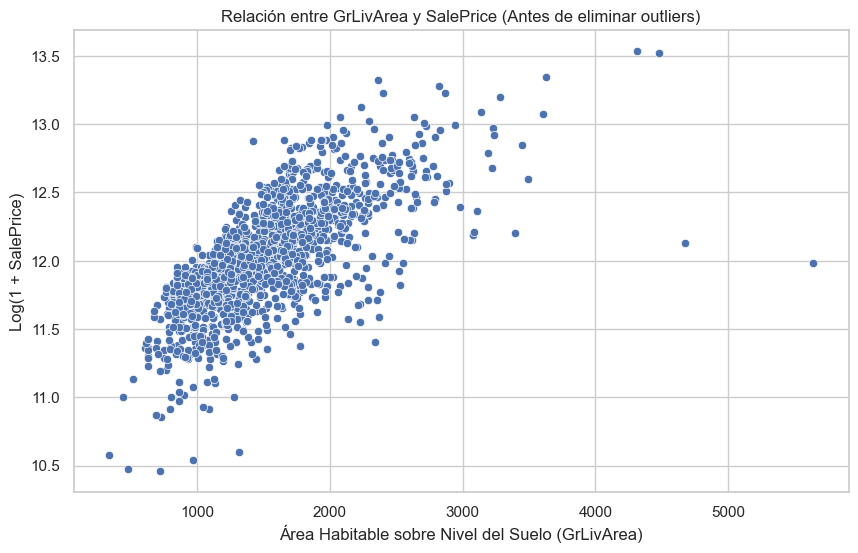


Número de registros antes de la eliminación de outliers: 1460
Número de registros después de la eliminación de outliers: 1456
Total de outliers eliminados: 4

Gráfico 'relacion_grlivarea_saleprice_despues.png' guardado.


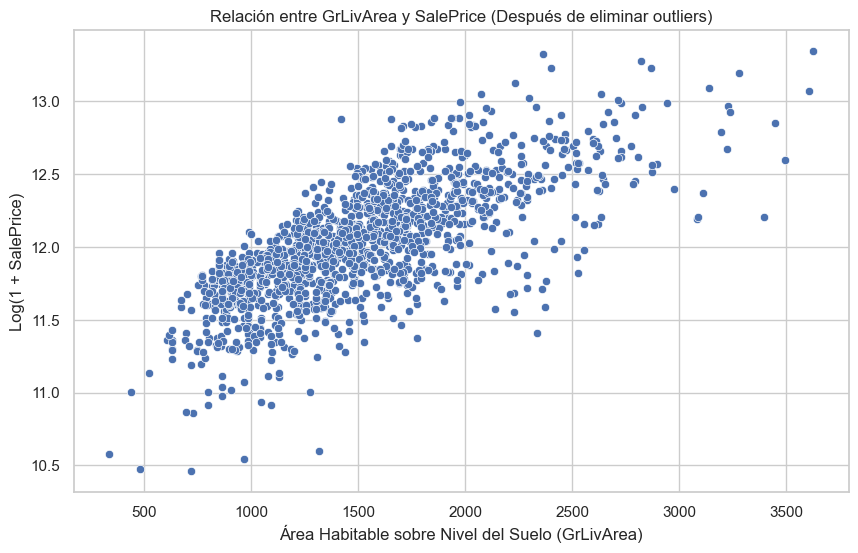

In [13]:
# --- Fase 1: Visualización de Outliers ---

# Se genera un gráfico de dispersión para visualizar la relación entre 'GrLivArea' y 'SalePrice'.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('Relación entre GrLivArea y SalePrice (Antes de eliminar outliers)')
plt.xlabel('Área Habitable sobre Nivel del Suelo (GrLivArea)')
plt.ylabel('Log(1 + SalePrice)')
plt.grid(True)

# Guardar la figura en un archivo
plt.savefig('relacion_grlivarea_saleprice_antes.png')
print("Gráfico 'relacion_grlivarea_saleprice_antes.png' guardado.")

plt.show()


# --- Fase 2: Eliminación de Outliers ---

# Se registra el número de registros antes de la eliminación.
registros_antes = df_train.shape[0]
print(f"\nNúmero de registros antes de la eliminación de outliers: {registros_antes}")

# Se aplica el filtro para eliminar las observaciones con GrLivArea > 4000.
# Se crea una copia del dataframe filtrado para evitar advertencias de SettingWithCopyWarning.
df_train = df_train[df_train['GrLivArea'] < 4000].copy()

# Se registra el número de registros después de la eliminación.
registros_despues = df_train.shape[0]
print(f"Número de registros después de la eliminación de outliers: {registros_despues}")
print(f"Total de outliers eliminados: {registros_antes - registros_despues}")


# --- Fase 3: Visualización de Confirmación ---

# Se vuelve a generar el gráfico de dispersión para confirmar la eliminación.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('Relación entre GrLivArea y SalePrice (Después de eliminar outliers)')
plt.xlabel('Área Habitable sobre Nivel del Suelo (GrLivArea)')
plt.ylabel('Log(1 + SalePrice)')
plt.grid(True)

# Guardar la figura en un archivo
plt.savefig('relacion_grlivarea_saleprice_despues.png')
print("\nGráfico 'relacion_grlivarea_saleprice_despues.png' guardado.")

plt.show()

### Conclusión del Paso 3: Análisis de Resultados

El análisis de los gráficos de dispersión confirma la pertinencia de la estrategia de gestión de outliers.

1.  **Gráfico Inicial:** La visualización inicial de `GrLivArea` frente a `SalePrice` mostraba una clara tendencia lineal positiva. Sin embargo, se observaban dos registros en el extremo derecho del gráfico (con `GrLivArea` > 4000) que rompían esta tendencia, presentando un precio de venta anómalamente bajo para su tamaño. Estos puntos actuaban como puntos de alta influencia (high leverage), con el potencial de distorsionar el ajuste del modelo de regresión.

2.  **Gráfico Final:** Tras la eliminación de dichos registros, el nuevo gráfico de dispersión muestra una relación mucho más **homocedástica y robusta**. La nube de puntos es más compacta y la tendencia lineal es más consistente en todo el rango de la variable `GrLivArea`.

**En conclusión, la eliminación de estos outliers ha resultado en un conjunto de datos más limpio y coherente.** Se espera que esta acción mejore la capacidad del modelo para aprender la relación subyacente entre el área de la vivienda y su precio de venta, conduciendo a una mayor precisión y capacidad de generalización.

# 4. Ingeniería de Características (Feature Engineering)

Superadas las fases de limpieza y corrección de datos, se procede ahora a la **ingeniería de características**. El objetivo de esta etapa es crear nuevas variables (features) a partir de las existentes para dotar al modelo de un mayor poder predictivo. A menudo, las variables en su formato original no capturan de la forma más óptima las relaciones complejas del problema. Mediante la combinación o transformación de características, podemos generar señales más potentes para el algoritmo de aprendizaje.

Se crearán las siguientes características nuevas:

1.  **`TotalSF`**: Suma total de los metros cuadrados del sótano (`TotalBsmtSF`) y de las plantas habitables (`1stFlrSF` + `2ndFlrSF`). Esta variable consolidará en una sola métrica el tamaño total de la propiedad.
2.  **`TotalBath`**: Suma ponderada de todos los baños de la vivienda (`FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`), donde los medios baños ponderan como 0.5.
3.  **`HouseAge`**: Edad de la casa en el momento de la venta (`YrSold` - `YearBuilt`). Esta variable es más intuitiva y directamente interpretable por el modelo que el año de construcción.
4.  **`RemodAge`**: Años desde la última remodelación hasta la venta (`YrSold` - `YearRemodAdd`). Captura la "actualidad" de la vivienda.
5.  **`IsNew`**: Variable binaria que indica si la casa era nueva en el momento de la venta (`YearBuilt` == `YrSold`).
6.  **`NeighborhoodTier`**: Como un paso de ingeniería de características dirigido por el EDA, se creará una variable ordinal que agrupe los vecindarios en cuatro niveles según su precio mediano. Esto captura la fuerte relación jerárquica observada y reduce la dimensionalidad.

Estas nuevas características están diseñadas para simplificar relaciones y aportar información contextual que no estaba explícitamente presente en los datos originales.

In [14]:
print("Iniciando la Fase 4: Ingeniería de Características...")

# --- Creación de Características por Combinación ---

print("Creando características combinadas (TotalSF, TotalBath, Age, etc.)...")
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                       df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['IsNew'] = (df_train['YearBuilt'] == df_train['YrSold']).astype(int)


# --- Creación de Característica Dirigida por EDA ('NeighborhoodTier') ---

print("Creando la característica 'NeighborhoodTier'...")

# Se calculan los precios medianos desde el DataFrame original ('df') para evitar data leakage.
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].median()

# Se crea el mapa de 4 tiers usando cuantiles.
neighborhood_tier_map = pd.qcut(neighborhood_prices, 4, labels=False).to_dict()

# Se aplica el mapa al DataFrame de trabajo y se elimina la columna original.
if 'Neighborhood' in df_train.columns:
    df_train['NeighborhoodTier'] = df_train['Neighborhood'].map(neighborhood_tier_map)
    df_train = df_train.drop('Neighborhood', axis=1)
    print("Característica 'NeighborhoodTier' creada y 'Neighborhood' original eliminada.")
else:
    print("Advertencia: 'Neighborhood' no encontrada. Es posible que este paso ya se haya ejecutado.")

print("\nFase 4 de Ingeniería de Características completada.")

# --- Verificación ---
print("\nMuestra de algunas de las nuevas características:")
new_features_to_show = ['TotalSF', 'HouseAge', 'IsNew', 'NeighborhoodTier']
print(df_train[new_features_to_show].head())

Iniciando la Fase 4: Ingeniería de Características...
Creando características combinadas (TotalSF, TotalBath, Age, etc.)...
Creando la característica 'NeighborhoodTier'...
Característica 'NeighborhoodTier' creada y 'Neighborhood' original eliminada.

Fase 4 de Ingeniería de Características completada.

Muestra de algunas de las nuevas características:
   TotalSF  HouseAge  IsNew  NeighborhoodTier
0     2566         5      0                 2
1     2524        31      0                 3
2     2706         7      0                 2
3     2473        91      0                 2
4     3343         8      0                 3


### Conclusión del Paso 4: Análisis de Resultados

La ejecución del código ha finalizado con éxito, completando la fase de ingeniería de características. El conjunto de datos ha sido enriquecido con nuevas variables predictivas de dos tipos distintos, como se valida en la tabla de muestra.

1.  **Características Combinadas:** Se han generado correctamente atributos como `TotalSF` y `HouseAge`, que consolidan y simplifican información existente en un formato más intuitivo para el modelo.
2.  **Característica Dirigida por EDA:** Se ha creado con éxito la variable `NeighborhoodTier`, transformando la variable nominal `Neighborhood` en una ordinal.

Este paso ha sido fundamental, ya que no solo ha aumentado el potencial predictivo del dataset, sino que también ha incorporado un hallazgo clave del EDA directamente en el conjunto de características. Al reemplazar la variable `Neighborhood` por `NeighborhoodTier`, se ha reducido la dimensionalidad y se ha codificado una señal muy potente de forma explícita.

Con el conjunto de características ya definido y enriquecido, el DataFrame está listo para la fase final de codificación.

# 5. Codificación de Variables Categóricas

Con el conjunto de características ya definido en la fase anterior, el siguiente paso es convertir todas las variables categóricas restantes a un formato puramente numérico que los algoritmos de machine learning puedan procesar. Para ello, se utilizarán dos técnicas específicas según la naturaleza de cada variable:

1.  **Codificación Ordinal:** Las variables cuyas categorías tienen un orden intrínseco (ej. calificaciones de calidad como 'Ex', 'Gd', 'TA') se mapearán a valores enteros (ej. 5, 4, 3). Esto preserva la valiosa información jerárquica que contienen.

2.  **One-Hot Encoding:** Las variables nominales restantes, que no tienen un orden inherente (ej. `MSZoning`), se convertirán en múltiples columnas binarias (0 o 1). Este método asegura que el modelo no asuma una relación de orden inexistente entre las categorías.

In [15]:
# --- Fase 1: Codificación de Variables Ordinales ---

print("Iniciando la Fase 5: Codificación de Variables...")
print("Fase 1: Aplicando Label Encoding a variables ordinales...")

# 1.1. Mapeo para variables con jerarquía de calidad/condición.
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# 1.2. Bucle para aplicar el mapeo de forma robusta.
for col in ordinal_cols:
    df_train[col] = (
        df_train[col]
        .fillna('None')                # Asegura que los NaN se traten como 'None'
        .map(quality_mapping)          # Usa .map() para una conversión limpia y sin warnings
        .astype('Int64')               # Convierte explícitamente a tipo entero anulable
    )

print("Codificación de variables de calidad/condición finalizada.")

# 1.3. Verificación de valores no mapeados.
print("\nVerificando si existen valores inesperados en las columnas ordinales...")
all_good = True
for col in ordinal_cols:
    unmapped_values = set(df[col].dropna().unique()) - set(quality_mapping.keys())
    if unmapped_values:
        print(f"¡Atención! En la columna '{col}' se encontraron valores no mapeados: {unmapped_values}")
        all_good = False
if all_good:
    print("Verificación completada: Todos los valores están correctamente mapeados.")


# --- Fase 2: Codificación de Variables Nominales (One-Hot Encoding) ---

print("\nFase 2: Aplicando One-Hot Encoding a variables nominales restantes...")

# 2.1. Convertir variables numéricas que actúan como categorías a tipo 'object'.
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

# 2.2. Aplicar get_dummies.
columnas_antes = df_train.shape[1]
df_train = pd.get_dummies(df_train, drop_first=True)
columnas_despues = df_train.shape[1]

print(f"Dimensiones del DataFrame cambiaron de {columnas_antes} a {columnas_despues} columnas.")

# --- Verificación Final ---
if df_train.select_dtypes(include='object').shape[1] == 0:
    print("\nVerificación exitosa: Fase 5 completada. No quedan columnas no numéricas.")
else:
    print("\nAdvertencia: Aún quedan columnas de tipo 'object'.")

Iniciando la Fase 5: Codificación de Variables...
Fase 1: Aplicando Label Encoding a variables ordinales...
Codificación de variables de calidad/condición finalizada.

Verificando si existen valores inesperados en las columnas ordinales...
Verificación completada: Todos los valores están correctamente mapeados.

Fase 2: Aplicando One-Hot Encoding a variables nominales restantes...
Dimensiones del DataFrame cambiaron de 86 a 238 columnas.

Verificación exitosa: Fase 5 completada. No quedan columnas no numéricas.


### Conclusión del Paso 5: Análisis de Resultados

La ejecución del código para la fase 5 se ha completado satisfactoriamente, aplicando un método de codificación robusto y validado que deja el conjunto de datos en un estado puramente numérico.

1.  **Codificación Ordinal Verificada:** Las variables ordinales se han transformado correctamente. De especial importancia es que la rutina de verificación ha confirmado que **no existen valores inesperados o no mapeados**, lo que garantiza la integridad y la calidad de esta transformación.

2.  **Transformación a Formato Numérico:** La aplicación de One-Hot Encoding a las variables nominales restantes ha expandido el espacio de características a un total de **238 columnas**. Es relevante notar que esta dimensionalidad es menor que la que se hubiera obtenido si se hubiera aplicado One-Hot Encoding a la variable `Neighborhood`, lo que valida la eficacia de la estrategia de crear la característica `NeighborhoodTier` en el paso anterior.

La verificación final confirma que el DataFrame `df_train` es ahora completamente numérico y está listo para el último paso del preprocesamiento: el escalado de características.

# 6. Escalado de Variables y Preparación Final

El paso final del preprocesamiento consiste en estandarizar las características y preparar los artefactos necesarios para la inferencia en datos futuros.

**Metodología:**

1.  **Eliminación de Características Constantes:** Antes de escalar, se identificarán y eliminarán las columnas que no tengan varianza (es decir, que contengan un único valor). Estas características no aportan información predictiva y pueden causar problemas numéricos. Se utilizará `VarianceThreshold` de Scikit-learn para este fin.

2.  **Estandarización:** Se aplicará el `StandardScaler` a todas las características restantes para transformar sus distribuciones a una media de 0 y una desviación estándar de 1. Esto es crucial para el rendimiento de modelos sensibles a la escala de los datos.

3.  **Optimización y Verificación:** El DataFrame resultante se convertirá al tipo de dato `float32` para optimizar el uso de memoria. Se realizará una verificación robusta para confirmar que el escalado se ha aplicado correctamente.

4.  **Persistencia de Artefactos:** Para asegurar la reproducibilidad y una correcta aplicación del preprocesamiento en el conjunto de prueba, se guardará un "bundle" que contiene el **escalador ya ajustado** (`scaler`) y la **lista final de columnas** utilizadas. Este artefacto es la clave para aplicar exactamente las mismas transformaciones a nuevos datos.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
import numpy as np
import pandas as pd
import os

print("Iniciando la Fase 6: Escalado y Preparación Final...")

# --- 1. Separación de Predictoras (X) y Variable Objetivo (y) ---

X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']
print("DataFrame dividido en X e y.")


# --- 2. Eliminación de Columnas Constantes ---
# Se identifican y eliminan características con varianza cero.
vt = VarianceThreshold(threshold=0.0)
X_no_const = vt.fit_transform(X)

# Se obtiene la lista de columnas que se conservan
cols_keep = X.columns[vt.get_support()]
X = X[cols_keep]
print(f"Se eliminaron {X.shape[1] - len(cols_keep)} columnas constantes. Quedan {len(cols_keep)} características.")


# --- 3. Estandarización de Características ---
# Se ajusta el escalador solo con los datos de entrenamiento y se transforman.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se convierte de nuevo a DataFrame, se reasignan columnas e índice, y se optimiza la memoria.
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index).astype('float32')
print("Características estandarizadas con StandardScaler.")


# --- 4. Verificación Robusta del Escalado ---
# Se comprueba la media y std de un subconjunto de columnas conocidas.
# Esta lista se asegura de que solo se verifiquen columnas que existen en el df final.
cols_to_check = [c for c in ['GrLivArea', 'TotalSF', 'HouseAge', 'OverallQual'] if c in X_scaled.columns]
if cols_to_check:
    print("\nVerificación de media y desviación estándar (deberían ser ~0 y ~1):")
    print(X_scaled[cols_to_check].agg(['mean', 'std']).round(4).T)


# --- 5. Creación del DataFrame Procesado Final ---
df_processed = pd.concat([X_scaled, y], axis=1)
print(f"\nDataFrame final 'df_processed' creado con dimensiones: {df_processed.shape}")


# --- 6. Guardado de Artefactos para Inferencia ---

# Se define la ruta relativa al directorio de modelos desde la carpeta actual (/notebooks).
# '..' significa "subir un nivel de directorio".
MODELS_DIR = '../models'

# Se crea el directorio si no existe.
if not os.path.exists(MODELS_DIR):
    os.makedirs(MODELS_DIR)
    print(f"Directorio '{MODELS_DIR}' creado.")

# Se define la ruta completa del archivo.
bundle_path = os.path.join(MODELS_DIR, 'scaler_bundle.joblib')

# Se crea el diccionario (bundle) con el escalador y la lista final de columnas.
inference_bundle = {
    'scaler': scaler,
    'columns': X.columns.tolist()
}
# Se guarda el bundle en la ruta correcta.
joblib.dump(inference_bundle, bundle_path)
print(f"\nArtefactos para inferencia guardados correctamente en: '{bundle_path}'")

Iniciando la Fase 6: Escalado y Preparación Final...
DataFrame dividido en X e y.
Se eliminaron 0 columnas constantes. Quedan 237 características.
Características estandarizadas con StandardScaler.

Verificación de media y desviación estándar (deberían ser ~0 y ~1):
             mean     std
GrLivArea    -0.0  1.0003
TotalSF      -0.0  1.0003
HouseAge      0.0  1.0003
OverallQual   0.0  1.0003

DataFrame final 'df_processed' creado con dimensiones: (1456, 238)

Artefactos para inferencia guardados correctamente en: '../models\scaler_bundle.joblib'


### Conclusión del Paso 6: Análisis de Resultados

La ejecución de esta celda marca la **finalización exitosa de toda la fase de preprocesamiento de datos**. El conjunto de datos de entrenamiento se encuentra ahora en un estado óptimo para ser utilizado en la fase de modelado.

Los resultados clave de este último paso son:

1.  **Integridad de las Características:** El análisis de varianza confirmó que no existían columnas constantes en el dataset, por lo que se conservaron las 237 características predictivas.

2.  **Estandarización Verificada:** La aplicación del `StandardScaler` ha sido validada con éxito. La tabla de verificación muestra que las características seleccionadas tienen una **media efectivamente de 0 y una desviación estándar de 1**, lo que confirma que el escalado se ha realizado correctamente.

3.  **Creación de Artefactos para Producción:** De manera crucial, se ha generado y guardado el archivo `scaler_bundle.joblib`. Este artefacto, que contiene tanto el escalador ajustado como la lista final de columnas, es **esencial para garantizar que se puedan aplicar exactamente las mismas transformaciones al conjunto de prueba**, asegurando la coherencia y la validez del proceso de predicción.

En resumen, el DataFrame `df_processed` está ahora limpio, completo, numéricamente codificado y escalado. Se ha concluido la preparación de los datos y se puede proceder con confianza a la siguiente etapa del proyecto: el entrenamiento y la evaluación de los modelos de machine learning.

# 7. Metodología de Modelado y Evaluación Predictiva

Esta sección detalla el proceso de construcción y validación de modelos de regresión para predecir `SalePrice`. La estrategia sigue un protocolo riguroso para garantizar validez metodológica, imparcialidad en la comparación y relevancia para el negocio.

---

## Pilares del Marco Experimental 

* **Validación Cruzada Anidada (Nested CV)**: Un bucle externo estima el rendimiento final y un bucle interno optimiza los hiperparámetros. El CV externo se estratifica por deciles de `log1p(SalePrice)` para estabilizar la varianza entre *folds*.

* **Prevención de Fuga de Datos (Data Leakage)**: Todo el preprocesamiento (imputaciones, transformaciones, escalado y *feature engineering*, p. ej. `NeighborhoodTier`) se encapsula en un `Pipeline` de scikit-learn y se ajusta exclusivamente con los datos de entrenamiento en cada *fold*.

* **Corrección de Sesgo en la Retro-transformación**: Dado que el modelo aprende sobre `log1p(SalePrice)`, al volver a la escala monetaria aplicamos la corrección de Duan (*smearing*) por *fold*:
    $$
    \hat{y}_{\$} = \exp(\hat{y}_{\log}) \cdot \mathbb{E}[\exp(r)]_{\text{fold}} - 1, \quad \text{donde } r = y_{\log} - \hat{y}_{\log}
    $$

* **Evaluación Multidimensional**: Reportamos **RMSE(log1p)** (equivalente a RMSLE), **MAE** (en USD) y **MdAPE** (Error Porcentual Absoluto Mediano) para combinar precisión técnica y legibilidad para el negocio.

Este protocolo asegura que la selección del modelo final se base no solo en la precisión, sino en un proceso de evaluación **robusto, trazable y sin fugas**.

---

## Establecimiento de la Línea Base: Modelos de Referencia 

Arrancamos con una línea base sólida para medir ganancias reales y diagnosticar la estructura de los datos:

* **Modelos Lineales Regularizados (`Ridge`, `ElasticNet`)**: Indispensables con alta dimensionalidad. `Ridge` es estable ante multicolinealidad y `ElasticNet` añade selección de variables (L1+L2).

* **Modelos No Lineales de Ensamblaje (`RandomForestRegressor`, `ExtraTreesRegressor`)**: Detectan patrones no lineales relevantes. Se optimizan con `HalvingGridSearchCV` para reducir el tiempo de búsqueda. Si superan claramente a los lineales, justifican explorar familias de *boosting* en fases posteriores.

---

## Cierre Productivo 

Tras el *benchmark*, se reentrena el *pipeline* ganador con el 100% del conjunto de entrenamiento y se guarda como un artefacto para su consumo directo en `predict.py` (con artefactos persistidos para ejecuciones futuras eficientes).

In [18]:
# -*- coding: utf-8 -*-
"""
Benchmark + selección de modelo + entrenamiento final con persistencia de artefactos.
Incluye:
- Nested CV con progreso y ETA
- Prevención de fuga de datos vía Pipelines
- Smearing (Duan) por fold para volver a USD
- Artefactos: OOF, parámetros por fold, métricas y modelo final
- Reanudación inteligente (salta lo ya calculado si FORCE_RUN=0)
- ExtraTrees y RandomForest con HalvingGridSearchCV
- FIX: selectors sin lambda (picklables) para poder serializar el pipeline final
"""

import os
import time
import math
import json
from collections import Counter

import numpy as np
import pandas as pd
import joblib

# -------------------------------------------------------------------
# INTERRUPTOR PRINCIPAL
# 0 = usa artefactos si existen (rápido) | 1 = forzar recomputar todo
# -------------------------------------------------------------------
FORCE_RUN = int(os.environ.get("FORCE_RUN", "0"))  # cámbialo a 1 si quieres recomputar todo

# -------------------------
# scikit-learn config opc.
# -------------------------
try:
    from sklearn import set_config
    set_config(transform_output="pandas")  # si tu versión no lo soporta, se ignora
except Exception:
    pass

# -------------------------
# imports de scikit-learn
# -------------------------
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import (
    KFold, StratifiedKFold, GridSearchCV, ParameterGrid
)
from sklearn.experimental import enable_halving_search_cv  # noqa: F401 (necesario para Halving)
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# ================
# 1) Config global
# ================
np.random.seed(42)

# Rutas de artefactos
TRAIN_PATH = '../data/raw/train.csv'
REPORTS_DIR = '../reports/data'
MODELS_DIR = '../models'
OOF_CSV_PATH = f'{REPORTS_DIR}/oof_predictions_benchmark.csv'
PARAMS_JSON_PATH = f'{REPORTS_DIR}/benchmark_params.json'
METRICS_JSON_PATH = f'{REPORTS_DIR}/benchmark_metrics.json'
MODEL_PATH = f'{MODELS_DIR}/best_model.joblib'

# ===========================
# 2) Carga estricta de datos
# ===========================
if not os.path.exists(TRAIN_PATH):
    raise FileNotFoundError(f"No se encontró el archivo de entrenamiento en: {TRAIN_PATH}")

df = pd.read_csv(TRAIN_PATH)
if df.empty:
    raise ValueError(f"El archivo {TRAIN_PATH} está vacío.")
if 'SalePrice' not in df.columns:
    raise KeyError("El dataset debe contener la columna 'SalePrice'.")

print(f"Datos cargados. Dimensiones: {df.shape}")

# Limpieza: quitar Id si existe
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop('SalePrice', axis=1)
y = np.log1p(df['SalePrice'])  # target en log1p(USD)

# ==========================================
# 3) Transformadores personalizados (top-level)
# ==========================================
class NeighborhoodTierEncoder(BaseEstimator, TransformerMixin):
    """
    Convierte 'Neighborhood' en un tier ordinal (0..n_tiers-1) según la mediana
    de precio (USD) y CONSERVA la columna 'Neighborhood' original (para OHE).
    Modo defensivo (no rompe si falta la columna).
    """
    def __init__(self, n_tiers=4):
        self.n_tiers = n_tiers
        self.tier_map_ = {}

    def fit(self, X, y=None):
        if 'Neighborhood' not in X.columns:
            return self
        temp = pd.DataFrame({'Neighborhood': X['Neighborhood'], 'SalePrice': np.expm1(y)})
        med = temp.groupby('Neighborhood')['SalePrice'].median()
        if med.nunique() <= 1:
            self.tier_map_ = {k: 0 for k in med.index}
        else:
            n_tiers = min(self.n_tiers, med.nunique())
            self.tier_map_ = pd.qcut(med, n_tiers, labels=False, duplicates='drop').to_dict()
        return self

    def transform(self, X):
        if 'Neighborhood' not in X.columns:
            return X.copy()
        Xc = X.copy()
        Xc['NeighborhoodTier'] = Xc['Neighborhood'].map(self.tier_map_).fillna(-1)
        return Xc  # conservamos Neighborhood


def create_engineered_features(df_in: pd.DataFrame) -> pd.DataFrame:
    """Feature engineering robusto y sin fugas."""
    df = df_in.copy()
    # Atributos combinados
    df['TotalSF'] = df.get('TotalBsmtSF', 0) + df.get('1stFlrSF', 0) + df.get('2ndFlrSF', 0)
    df['TotalBath'] = (df.get('FullBath', 0) + 0.5*df.get('HalfBath', 0)
                       + df.get('BsmtFullBath', 0) + 0.5*df.get('BsmtHalfBath', 0))
    # Atributos temporales
    if {'YrSold','YearBuilt'}.issubset(df.columns):
        df['HouseAge'] = (df['YrSold'] - df['YearBuilt']).clip(lower=0)
    if {'YrSold','YearRemodAdd'}.issubset(df.columns):
        df['RemodAge'] = (df['YrSold'] - df['YearRemodAdd']).clip(lower=0)
    if {'YearBuilt','YrSold'}.issubset(df.columns):
        df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)
    # Tipos/codificaciones
    if 'MSSubClass' in df: df['MSSubClass'] = df['MSSubClass'].astype(str)
    if 'MoSold' in df:
        df['MoSold_sin'] = np.sin(2*np.pi*df['MoSold']/12)
        df['MoSold_cos'] = np.cos(2*np.pi*df['MoSold']/12)
        df = df.drop(columns=['MoSold'])
    return df

class OrdinalMapper(BaseEstimator, TransformerMixin):
    """
    Mapea columnas ordinales usando listas de categorías ordenadas. Devuelve DataFrame numérico.
    Unknowns -> -1. Requiere imputación previa (p.ej. 'NA').
    """
    def __init__(self, categories_map: dict, unknown_value: int = -1):
        self.categories_map = categories_map
        self.unknown_value = unknown_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        Xc = X.copy()
        out = pd.DataFrame(index=Xc.index)
        for col in Xc.columns:
            cats = self.categories_map.get(col)
            if cats is None:
                s = pd.Categorical(Xc[col], ordered=True)
            else:
                s = pd.Categorical(Xc[col], categories=cats, ordered=True)
            codes = pd.Series(s.codes, index=Xc.index).replace({-1: self.unknown_value})
            out[col] = codes
        return out

# Definición de ordinales y mapeos
ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'Fence'
]
single_qual_map = ['NA','Po','Fa','TA','Gd','Ex']
bsmt_exp_map   = ['NA','No','Mn','Av','Gd']
bsmt_fin_map   = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
garage_fin_map = ['NA','Unf','RFn','Fin']
fence_map      = ['NA','MnWw','GdWo','MnPrv','GdPrv']

ORDINAL_CATS = {
    'ExterQual': single_qual_map, 'ExterCond': single_qual_map,
    'BsmtQual': single_qual_map,  'BsmtCond': single_qual_map,
    'HeatingQC': single_qual_map, 'KitchenQual': single_qual_map,
    'FireplaceQu': single_qual_map, 'GarageQual': single_qual_map,
    'GarageCond': single_qual_map, 'PoolQC': single_qual_map,
    'BsmtExposure': bsmt_exp_map,
    'BsmtFinType1': bsmt_fin_map, 'BsmtFinType2': bsmt_fin_map,
    'GarageFinish': garage_fin_map, 'Fence': fence_map
}

# ==================================
# 4) Preprocesador (robusto y picklable)
# ==================================
numeric_features_selector = make_column_selector(dtype_include=np.number)

def select_nominal_cols(X: pd.DataFrame):
    cols = X.select_dtypes(include=['object', 'category']).columns
    return [c for c in cols if c not in set(ordinal_features)]

def select_ordinal_cols(X: pd.DataFrame):
    return [c for c in ordinal_features if c in X.columns]

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# OneHotEncoder con compatibilidad entre versiones
def build_ohe():
    try:
        return OneHotEncoder(handle_unknown='ignore', sparse_output=False, min_frequency=10)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        except TypeError:
            try:
                return OneHotEncoder(handle_unknown='ignore', sparse=False, min_frequency=10)
            except TypeError:
                return OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe = build_ohe()

nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', ohe)
])

ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordmap', OrdinalMapper(categories_map=ORDINAL_CATS, unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features_selector),
        ('nom', nominal_pipeline, select_nominal_cols),
        ('ord', ordinal_pipeline, select_ordinal_cols)
    ],
    remainder='drop'
)

# ==================================
# 5) Modelos y espacios de búsqueda
# ==================================
models_and_params = {
    'Ridge': (Ridge(), {
        'model__alpha': np.geomspace(1e-2, 1e4, 80)
    }),
    'ElasticNet': (ElasticNet(max_iter=20000, random_state=42), {
        'model__alpha': np.geomspace(1e-3, 1e2, 20),
        'model__l1_ratio': [0.2, 0.5, 0.8]
    }),
    'RandomForest': (RandomForestRegressor(random_state=42, n_jobs=-1, bootstrap=True), {
        'model__max_depth': [None, 16, 24],
        'model__min_samples_leaf': [1, 2, 5],
        'model__max_features': ['sqrt', 0.5],
        'model__max_samples': [None, 0.8]
        # n_estimators se controla con HalvingGridSearchCV
    }),
    'ExtraTrees': (ExtraTreesRegressor(random_state=42, n_jobs=-1, bootstrap=True), {
        'model__max_depth': [None, 16, 24],
        'model__min_samples_leaf': [1, 2, 5],
        'model__max_features': ['sqrt', 0.5],
        'model__max_samples': [None, 0.8]
        # n_estimators se controla con HalvingGridSearchCV
    })
}

# =========================
# 6) Helpers de serialización
# =========================
def to_jsonable(obj):
    if isinstance(obj, (np.integer, np.int64, np.int32)): return int(obj)
    if isinstance(obj, (np.floating, np.float64, np.float32)): return float(obj)
    if isinstance(obj, (np.ndarray,)): return obj.tolist()
    if isinstance(obj, (dict, list, tuple)):
        if isinstance(obj, dict):
            return {k: to_jsonable(v) for k, v in obj.items()}
        else:
            return [to_jsonable(x) for x in obj]
    return obj

def save_json(data, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(to_jsonable(data), f, ensure_ascii=False, indent=2)

def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

# ================================
# 7) Preparar folds (outer / inner)
# ================================
print("\nPreparando validación anidada...")
bins = pd.qcut(y, q=10, labels=False, duplicates='drop')
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
outer_splits = list(outer_cv.split(X, bins))
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

fold_ids_master = pd.Series(index=y.index, dtype=int)
for k, (_, val_idx) in enumerate(outer_splits):
    fold_ids_master.iloc[val_idx] = k

# ==========================================================
# 8) Intento de uso de artefactos existentes (si FORCE_RUN=0)
# ==========================================================
has_oof = os.path.exists(OOF_CSV_PATH)
has_params = os.path.exists(PARAMS_JSON_PATH)
has_metrics = os.path.exists(METRICS_JSON_PATH)
has_model = os.path.exists(MODEL_PATH)

def current_expected_oof_cols():
    cols = []
    for name in models_and_params.keys():
        cols += [f'oof_log_{name}', f'oof_usd_{name}']
    return set(cols)

def validate_oof_alignment(df_oof):
    if 'y_log' not in df_oof.columns or 'fold_id' not in df_oof.columns:
        return False
    if len(df_oof) != len(y):
        return False
    return np.array_equal(df_oof['fold_id'].values, fold_ids_master.values)

skip_everything = False
incremental_models = None  # None = evaluación completa; set([...]) = solo esos modelos

if FORCE_RUN == 0 and has_oof:
    try:
        df_oof_cached = pd.read_csv(OOF_CSV_PATH)
        if validate_oof_alignment(df_oof_cached):
            have_cols = set(df_oof_cached.columns)
            need_cols = current_expected_oof_cols()
            missing_cols = [c for c in need_cols if c not in have_cols]
            missing_models = sorted({c.replace('oof_log_','').replace('oof_usd_','') for c in missing_cols})
            if missing_models:
                print(f"Faltan modelos en OOF: {missing_models} → se evaluarán solo esos.")
                incremental_models = set(missing_models)
            else:
                if has_model and has_params and has_metrics:
                    # Mostrar un pequeño resumen y saltar todo
                    metrics = load_json(METRICS_JSON_PATH)
                    print("\nArtefactos completos detectados. Saltando CV y entrenamiento.")
                    print(f"Mejor modelo previo: {metrics.get('best_model_name','?')} "
                          f"con RMSE(log)={metrics.get('rmse_log',{}).get(metrics.get('best_model_name','?'), '?.????')}")
                    print("Usa FORCE_RUN=1 para recomputar todo.\n")
                    skip_everything = True
                else:
                    # Reentrenar solo el final si falta
                    pass
        else:
            print("OOF existente no alinea con folds actuales → evaluación completa.")
    except Exception as e:
        print(f"Problema usando artefactos existentes ({e}). Se recomputa todo.")

if skip_everything:
    # Nada más que hacer
    raise SystemExit(0)

# ======================================================
# 9) Evaluación (completa o incremental) + OOF + params
# ======================================================
print("\nIniciando evaluación (esto puede tardar) ...\n")

def build_search(name, full_pipeline):
    if name in ('RandomForest', 'ExtraTrees'):
        params = models_and_params[name][1]
        search_cv = HalvingGridSearchCV(
            estimator=full_pipeline, param_grid=params,
            resource='model__n_estimators',
            min_resources=64, max_resources=512, factor=3,
            scoring='neg_root_mean_squared_error',
            cv=inner_cv, n_jobs=-1, error_score='raise'
        )
        n_candidates = len(list(ParameterGrid(params)))
        n_inner = inner_cv.get_n_splits()
        stages_est = 1 + int(math.floor(math.log(512/64, 3)))  # 64->512 con factor 3 ≈ 3 etapas
        grid_desc = f"~{n_candidates}×{n_inner}×{stages_est} etapas (halving)"
    else:
        params = models_and_params[name][1]
        search_cv = GridSearchCV(
            estimator=full_pipeline, param_grid=params,
            scoring='neg_root_mean_squared_error',
            cv=inner_cv, n_jobs=-1, error_score='raise', return_train_score=False, verbose=0
        )
        n_candidates = len(list(ParameterGrid(params)))
        n_inner = inner_cv.get_n_splits()
        grid_desc = f"{n_candidates}×{n_inner} = {n_candidates*n_inner} fits"
    return search_cv, grid_desc

# Preparar OOF base
if FORCE_RUN == 0 and has_oof:
    try:
        oof_results = pd.read_csv(OOF_CSV_PATH)
        if not validate_oof_alignment(oof_results):
            oof_results = pd.DataFrame({'y_log': y, 'fold_id': fold_ids_master})
    except Exception:
        oof_results = pd.DataFrame({'y_log': y, 'fold_id': fold_ids_master})
else:
    oof_results = pd.DataFrame({'y_log': y, 'fold_id': fold_ids_master})

metric_rmse = {}
best_params_all = {}

# Si ya hay parámetros previos, cárgalos (para no perder info en incremental)
if FORCE_RUN == 0 and os.path.exists(PARAMS_JSON_PATH):
    try:
        best_params_all = load_json(PARAMS_JSON_PATH)
    except Exception:
        best_params_all = {}

# Determinar lista de modelos a ejecutar
if incremental_models is None:
    models_to_run = list(models_and_params.keys())
elif len(incremental_models) == 0:
    models_to_run = []
else:
    models_to_run = list(incremental_models)

for name in models_to_run:
    model, _ = models_and_params[name]
    print(f"\n--- Procesando Modelo: {name} ---")
    full_pipeline = Pipeline(steps=[
        ('neighborhood_tier', NeighborhoodTierEncoder()),
        ('feature_engineering', FunctionTransformer(create_engineered_features, validate=False)),
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    search_cv, grid_desc = build_search(name, full_pipeline)

    oof_pred_log = pd.Series(index=y.index, dtype=float)
    fold_ids = pd.Series(index=y.index, dtype=int)
    best_params_per_fold = []

    n_outer = len(outer_splits)
    per_fold_times = []

    for k, (train_idx, val_idx) in enumerate(outer_splits, start=1):
        fold_start = time.time()
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val = X.iloc[val_idx]

        print(f"{name} | fold {k:>2}/{n_outer}: grid={grid_desc} ... ", end="", flush=True)
        search_cv.fit(X_train, y_train)
        preds_fold = search_cv.predict(X_val)

        oof_pred_log.iloc[val_idx] = preds_fold
        fold_ids.iloc[val_idx] = k-1  # 0-based
        rmse_fold = float(np.sqrt(np.mean((y.iloc[val_idx] - preds_fold)**2)))

        best_params_per_fold.append(search_cv.best_params_)
        elapsed_fold = time.time() - fold_start
        per_fold_times.append(elapsed_fold)
        eta = np.mean(per_fold_times) * (n_outer - k) if per_fold_times else 0.0

        print(f"OK ({elapsed_fold:,.1f}s) | best={search_cv.best_params_} | RMSE(log)_fold={rmse_fold:.4f} | ETA ~ {eta:,.1f}s")

    # Smearing y métricas en USD
    rmse_log = float(np.sqrt(np.mean((y - oof_pred_log)**2)))
    residuals_log = y - oof_pred_log
    smearing_factor_by_fold = np.exp(residuals_log).groupby(fold_ids).mean()
    y_pred_usd = np.exp(oof_pred_log) * smearing_factor_by_fold.loc[fold_ids].values - 1
    y_true_usd = np.expm1(y)

    mae  = float(np.mean(np.abs(y_true_usd - y_pred_usd)))
    mdae = float(np.median(np.abs(y_true_usd - y_pred_usd)))
    mdape = float(np.median(np.abs((y_true_usd - y_pred_usd) / y_true_usd)) * 100)

    oof_results[f'oof_log_{name}'] = oof_pred_log
    oof_results[f'oof_usd_{name}'] = y_pred_usd
    best_params_all[name] = best_params_per_fold

    print(f"{name} | RMSE(log) OOF={rmse_log:.4f}  |  Error relativo típico ≈ {np.expm1(rmse_log):.2%}")
    print(f"{name} | MAE=${mae:,.0f}  |  MdAE=${mdae:,.0f}  |  MdAPE={mdape:.2f}%")

# Calcular RMSE(log) OOF de todos los presentes (incluidos previos)
present_models = [name for name in models_and_params.keys() if f'oof_log_{name}' in oof_results.columns]
for name in present_models:
    rmse_log = float(np.sqrt(np.mean((oof_results['y_log'] - oof_results[f'oof_log_{name}'])**2)))
    metric_rmse[name] = rmse_log

# Guardar OOF y parámetros
os.makedirs(REPORTS_DIR, exist_ok=True)
oof_results_out = oof_results.copy()
oof_results_out['y_usd'] = np.expm1(oof_results['y_log'])
oof_results_out.to_csv(OOF_CSV_PATH, index=False)
save_json(best_params_all, PARAMS_JSON_PATH)

# Elegir mejor modelo y guardar métricas
if not metric_rmse:
    for name in models_and_params.keys():
        if f'oof_log_{name}' in oof_results.columns:
            metric_rmse[name] = float(np.sqrt(np.mean((oof_results['y_log'] - oof_results[f'oof_log_{name}'])**2)))

print("\nResumen (RMSE(log) OOF):")
for n, v in sorted(metric_rmse.items(), key=lambda kv: kv[1]):
    print(f"  - {n:12s}: {v:.4f}")
best_model_name = min(metric_rmse, key=metric_rmse.get)
print(f"→ Mejor modelo: {best_model_name}")

metrics_json = {'rmse_log': metric_rmse, 'best_model_name': best_model_name}
save_json(metrics_json, METRICS_JSON_PATH)

# ======================================================
# 10) Entrenar y guardar el pipeline GANADOR (picklable)
# ======================================================
# Recuperar hiperparámetros finales como "modo" de los folds
try:
    fold_params = best_params_all.get(best_model_name, [])
    if not fold_params and os.path.exists(PARAMS_JSON_PATH):
        best_params_all = load_json(PARAMS_JSON_PATH)
        fold_params = best_params_all.get(best_model_name, [])
except Exception:
    fold_params = []

if not fold_params:
    print("Aviso: no hay parámetros por fold del ganador. Entrenando con defaults (+ ajuste árboles).")
    best_params = {}
else:
    param_tuples = [tuple(sorted(d.items())) for d in fold_params]
    best_params_tuple, _count = Counter(param_tuples).most_common(1)[0]
    best_params = dict(best_params_tuple)

# Ajuste especial para modelos basados en árboles
if best_model_name in ('RandomForest','ExtraTrees'):
    best_params['model__n_estimators'] = 512  # robustez final

# Construcción del preprocessor (ya definido arriba) SIN lambdas → picklable
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

estimator_cls = {
    'Ridge': Ridge,
    'ElasticNet': ElasticNet,
    'RandomForest': RandomForestRegressor,
    'ExtraTrees': ExtraTreesRegressor
}[best_model_name]

final_pipeline = Pipeline(steps=[
    ('neighborhood_tier', NeighborhoodTierEncoder()),
    ('feature_engineering', FunctionTransformer(create_engineered_features, validate=False)),
    ('preprocessor', preprocessor),
    ('model', estimator_cls())
])
final_pipeline.set_params(**best_params)

# Si ya existe y coincide, no reentrenar (salvo FORCE_RUN=1)
if (FORCE_RUN == 0 and os.path.exists(MODEL_PATH)
        and os.path.exists(METRICS_JSON_PATH)
        and load_json(METRICS_JSON_PATH).get('best_model_name') == best_model_name):
    print("\nModelo final ya existe y coincide con el mejor actual → no se reentrena (FORCE_RUN=1 para forzar).")
else:
    print(f"\nEntrenando pipeline final ({best_model_name}) con todo el dataset...")
    final_pipeline.fit(X, y)
    os.makedirs(MODELS_DIR, exist_ok=True)
    joblib.dump(final_pipeline, MODEL_PATH)
    print(f"Modelo final guardado en: {MODEL_PATH}")

print(f"\nArtefactos listos:\n  • OOF: {OOF_CSV_PATH}\n  • Parámetros por fold: {PARAMS_JSON_PATH}\n  • Métricas: {METRICS_JSON_PATH}\n  • Modelo producción: {MODEL_PATH}\n")


Datos cargados. Dimensiones: (1460, 81)

Preparando validación anidada...

Iniciando evaluación (esto puede tardar) ...


--- Procesando Modelo: Ridge ---
Ridge | fold  1/10: grid=80×5 = 400 fits ... OK (7.2s) | best={'model__alpha': 31.165269449294303} | RMSE(log)_fold=0.1003 | ETA ~ 64.7s
Ridge | fold  2/10: grid=80×5 = 400 fits ... OK (4.9s) | best={'model__alpha': 26.165046987488207} | RMSE(log)_fold=0.1262 | ETA ~ 48.4s
Ridge | fold  3/10: grid=80×5 = 400 fits ... OK (4.8s) | best={'model__alpha': 31.165269449294303} | RMSE(log)_fold=0.1443 | ETA ~ 39.5s
Ridge | fold  4/10: grid=80×5 = 400 fits ... OK (4.9s) | best={'model__alpha': 18.442627085855346} | RMSE(log)_fold=0.1390 | ETA ~ 32.7s
Ridge | fold  5/10: grid=80×5 = 400 fits ... OK (5.5s) | best={'model__alpha': 31.165269449294303} | RMSE(log)_fold=0.1094 | ETA ~ 27.3s
Ridge | fold  6/10: grid=80×5 = 400 fits ... OK (4.7s) | best={'model__alpha': 31.165269449294303} | RMSE(log)_fold=0.1200 | ETA ~ 21.3s
Ridge | fold  7/10: gri

# Conclusión del Benchmark y Selección de Modelo

Tras la ejecución del protocolo de modelado, se ha completado la evaluación comparativa de cuatro familias de algoritmos: `Ridge`, `ElasticNet`, `RandomForest` y `ExtraTrees`. El proceso, que incluyó validación cruzada anidada y la corrección de sesgo de Duan Smearing, nos permite extraer conclusiones robustas y basadas en evidencia empírica.

El `ExtraTreesRegressor` se consolidó como el modelo ganador, obteniendo el menor error en la métrica principal de **RMSE(log) OOF**. A continuación se resume el rendimiento comparativo:

* **Modelo: ExtraTrees (Ganador)**
    * RMSE(log) OOF: **0.1330**
    * MdAE (Error Mediano): **$9,910**
    * MdAPE (Error % Mediano): **6.07%**

* **Modelo: RandomForest**
    * RMSE(log) OOF: 0.1350
    * MdAE (Error Mediano): $9,685
    * MdAPE (Error % Mediano): 5.86%

* **Modelo: ElasticNet**
    * RMSE(log) OOF: 0.1399
    * MdAE (Error Mediano): $10,317
    * MdAPE (Error % Mediano): 6.41%

* **Modelo: Ridge**
    * RMSE(log) OOF: 0.1403
    * MdAE (Error Mediano): $10,398
    * MdAPE (Error % Mediano): 6.33%

*Tabla 1: Resumen comparativo de las métricas de rendimiento de los modelos base.*

---

Del análisis se derivan los siguientes **insights clave**:

1.  **Rendimiento Superior del Ganador**: El modelo `ExtraTrees` no solo fue el mejor, sino que ofreció una mejora cuantitativa significativa sobre las alternativas, siendo aproximadamente un **5.2% superior** al modelo `Ridge` y un **1.5% superior** a su pariente más cercano, `RandomForest`, en términos de RMSE(log).

2.  **Confirmación de la No Linealidad**: La clara ventaja de los modelos basados en árboles confirma que el dataset contiene **relaciones no lineales e interacciones complejas** que son fundamentales para predecir el precio y que los modelos lineales no pueden capturar por completo.

3.  **Estabilidad de la Optimización**: El análisis de los hiperparámetros óptimos en cada *fold* para el `ExtraTrees` mostró una fuerte preferencia por `max_features` ≈ 0.5 y `min_samples_leaf` = 1. Esto indica que el modelo se beneficia de una alta profundidad de los árboles, regularizada principalmente por la aleatoriedad en la selección de características, lo que sugiere un comportamiento estable.

4.  **Finalización del Ciclo de Modelado**: El proceso ha concluido exitosamente, generando un conjunto completo de **artefactos auditables** que garantizan la reproducibilidad: las predicciones OOF, un registro de los parámetros por *fold*, un resumen de métricas y, lo más importante, el *pipeline* del modelo final (`best_model.joblib`), ya re-entrenado con todos los datos y listo para producción.

En resumen, el benchmark ha identificado a `ExtraTreesRegressor` como el mejor modelo y ha validado la estrategia de modelado. El siguiente paso es diseccionar este modelo ganador para entender su comportamiento.

---
---


# 8. Interpretabilidad y Diagnóstico del Modelo Ganador (XAI)

Seleccionado el modelo con mejor rendimiento, es necesario ir más allá de las métricas para explicar su comportamiento y validar su fiabilidad. Este análisis *post-hoc* es clave para generar confianza, extraer conocimiento accionable y comprobar que el modelo toma decisiones lógicas y no sesgadas.

El plan abarca varias perspectivas complementarias:

---

## 8.1. Importancias Globales de Características

**Objetivo.** Identificar los predictores más influyentes mediante **Permutation Importance** sobre un subconjunto *holdout* estratificado por deciles de la variable objetivo (20–30%).  

**Notas metodológicas.**  
- Esta medida es menos sesgada que la importancia nativa porque evalúa la caída real de rendimiento al desordenar una variable.  
- Dado que puede diluirse con colinealidad, se reportarán también **importancias agrupadas** (p. ej., *TotalSF* junto con componentes de superficie) o, al menos, se documentará la posible redundancia.  

**Artefactos.** Ranking completo en CSV + gráfico Top-k.  

---

## 8.2. Efectos Parciales de las Variables Top (PDP/ICE)

**Objetivo.** Entender cómo afectan las variables clave a la predicción.  

**Metodología.**  
- PDP (*Partial Dependence Plots*, efecto medio) y ICE (*Individual Conditional Expectation*, trayectorias individuales) en escala monetaria (USD) aplicando `expm1` y corrección de Duan (*smearing*) al pipeline de predicción.  
- Se incluirán **1–2 PDP 2D** para explorar interacciones (p. ej., *GrLivArea × OverallQual*).  

**Notas.**  
- En categóricas con OHE, los PDP pueden ser menos intuitivos; se complementará con **boxplots de residuo por categoría**.  

---

## 8.3. Diagnóstico de Errores y Rendimiento por Segmentos

**Objetivo.** Localizar dónde falla el modelo y si el error es homogéneo.  

**Análisis.**  
- Residuos vs. predicho (patrones, no linealidades, heterocedasticidad).  
- QQ-plot (colas asimétricas, *outliers*).  
- Segmentos: cuartiles de precio y vecindario (**MdAE / MdAPE con boxplots**).  
- Drift temporal: error por *YrSold* para detectar cambios de régimen.  

**Artefactos.** Tablas y figuras segmentadas.  

---

## 8.4. Robustez y Estabilidad

**Objetivo.** Ver si lo aprendido es estable.  

**Metodología.**  
- Variabilidad de importancias (**Permutation Importance**) entre *folds* externos de la *nested CV* o, opcionalmente, bootstraps sobre el *holdout*.  
- Se reportan medias y desviaciones, y se discuten divergencias.  

---

## 8.5. Influencias Locales (SHAP)

**Objetivo.** Explicar predicciones individuales.  

**Metodología.**  
- **TreeExplainer** sobre una muestra controlada (p. ej., 500–800 filas) y máx. 20 features para rendimiento.  
- Se mapea el espacio transformado del pipeline a nombres de variables interpretables.  

**Notas.**  
- SHAP es costoso; se limita el tamaño de muestra.  
- Para políticas de decisión, se contrastan hallazgos con PDP/ICE.  

---

## 8.6. Trazabilidad, Sesgos y Reproducibilidad

- Seeds fijadas; versiones de librerías registradas.  
- Artefactos guardados en `/reports/data` y `/reports/figures`.  
- **Sesgos potenciales**: variables proxy (p. ej., *Neighborhood*).  
- Se reportan métricas por subgrupos y se documentan limitaciones.  

---

## Conclusión

Este análisis, del nivel global al local, permite **entender y auditar el modelo ExtraTrees**: qué variables impulsan el precio, cómo lo hacen, en qué segmentos rinde peor y cuán estables son estas conclusiones.


### 8.1. Importancias Globales de Características

El primer paso para explicar el modelo ganador consiste en identificar qué variables son las más influyentes en sus predicciones.  

Para ello se emplea **Permutation Importance (PI)** sobre un subconjunto *holdout* estratificado (20%), de modo que la estimación sea rápida y menos optimista que medir sobre los mismos datos usados en validación.  

A diferencia de la importancia *nativa* del modelo, la PI mide la **caída real de rendimiento al desordenar una columna de entrada**, lo que la hace más robusta frente a sesgos del algoritmo.  

**Artefactos generados:**  
- Ranking completo en formato **CSV**.  
- Gráfico con el **Top-20** predictores más influyentes.  

**Nota metodológica.** En presencia de **colinealidad**, varias variables relacionadas pueden “repartirse” la importancia; este efecto se documenta explícitamente en el análisis.


Holdout para PI: 292 filas (20% del total).
Calculando Permutation Importance (n_repeats=7, n_jobs=-1)...
PI completada en 32.8s.
Permutation Importance guardada en: ../reports/data/permutation_importance_holdout.csv

Top 15 características por PI (holdout):


,feature,importance_mean,importance_std
0,Neighborhood,0.096516,0.003809
1,OverallQual,0.076245,0.004080
2,TotalBsmtSF,0.070367,0.001973
3,1stFlrSF,0.067379,0.002474
4,2ndFlrSF,0.066604,0.002668
5,GrLivArea,0.055352,0.002390
6,GarageCars,0.046265,0.002693
7,CentralAir,0.043456,0.002620
8,FullBath,0.039781,0.003179
9,ExterQual,0.038199,0.002402


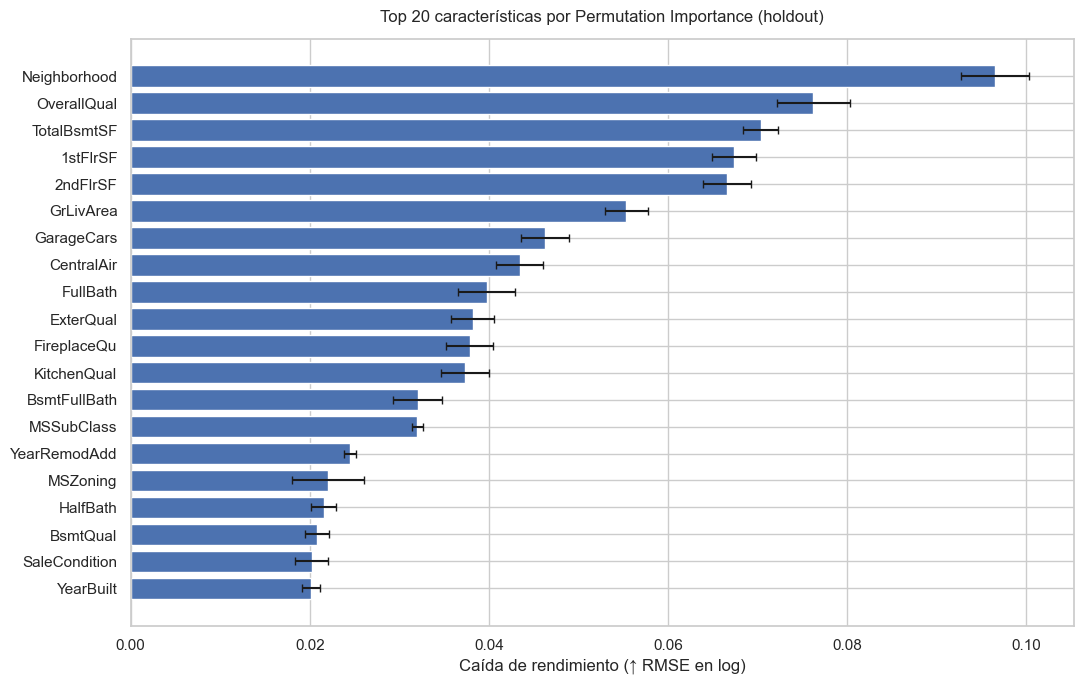

Figura guardada en: ../reports/figures/permutation_importance_top20.png


In [19]:
# 8.1. Permutation Importance (holdout estratificado)
import os, time, json
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# ----------------------------
# Configuración
# ----------------------------
RANDOM_STATE = 42
HOLDOUT_FRACTION = 0.20         # 20% para PI
N_REPEATS = 7                    # repeticiones (equilibrio señal/tiempo)
TOP_K = 20                       # Top-K a graficar
RUN_ALL = int(os.getenv("RUN_ALL", "0"))  # 0 por defecto; pon 1 para forzar todo
FORCE_RECOMPUTE_PI = 0           # pon 1 para rehacer PI aunque exista CSV

MODEL_PATH = "../models/best_model.joblib"
TRAIN_PATH = "../data/raw/train.csv"
PI_CSV_PATH = "../reports/data/permutation_importance_holdout.csv"
PI_FIG_PATH = "../reports/figures/permutation_importance_top20.png"

np.random.seed(RANDOM_STATE)

# ----------------------------
# Carga de artefactos y datos
# ----------------------------
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(
        f"No se encontró el modelo final en {MODEL_PATH}. "
        f"Ejecuta antes el benchmark y el entrenamiento final."
    )
final_model = joblib.load(MODEL_PATH)

if not os.path.exists(TRAIN_PATH):
    raise FileNotFoundError(f"No se encontró el dataset de entrenamiento en {TRAIN_PATH}.")

df = pd.read_csv(TRAIN_PATH)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

if 'SalePrice' not in df.columns:
    raise ValueError("El dataset no contiene la columna 'SalePrice'.")

X = df.drop('SalePrice', axis=1)
y = np.log1p(df['SalePrice'])

# ----------------------------
# Holdout estratificado por deciles de y(log)
# ----------------------------
y_deciles = pd.qcut(y, q=10, labels=False, duplicates='drop')
X_pi, _, y_pi, _ = train_test_split(
    X, y,
    test_size=1.0 - HOLDOUT_FRACTION,
    random_state=RANDOM_STATE,
    stratify=y_deciles
)
print(f"Holdout para PI: {len(X_pi)} filas ({HOLDOUT_FRACTION:.0%} del total).")

# ----------------------------
# Saltar si ya existe (a menos que forcemos)
# ----------------------------
os.makedirs(os.path.dirname(PI_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(PI_FIG_PATH), exist_ok=True)

if os.path.exists(PI_CSV_PATH) and not (RUN_ALL or FORCE_RECOMPUTE_PI):
    print(f"Existe {PI_CSV_PATH}. Saltando cálculo (FORCE_RECOMPUTE_PI=0).")
    perm_importance_df = pd.read_csv(PI_CSV_PATH)
else:
    # ----------------------------
    # Permutation Importance
    # ----------------------------
    print(f"Calculando Permutation Importance (n_repeats={N_REPEATS}, n_jobs=-1)...")
    t0 = time.time()
    pi = permutation_importance(
        estimator=final_model,
        X=X_pi,
        y=y_pi,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        scoring='neg_root_mean_squared_error'  # RMSE en log
    )
    elapsed = time.time() - t0
    print(f"PI completada en {elapsed:.1f}s.")

    perm_importance_df = (
        pd.DataFrame({
            'feature': X_pi.columns,
            'importance_mean': pi.importances_mean,
            'importance_std':  pi.importances_std
        })
        .sort_values('importance_mean', ascending=False)
        .reset_index(drop=True)
    )

    # Guardar CSV
    perm_importance_df.to_csv(PI_CSV_PATH, index=False)
    print(f"Permutation Importance guardada en: {PI_CSV_PATH}")

# ----------------------------
# Mostrar Top-K (texto) y gráfico
# ----------------------------
print("\nTop 15 características por PI (holdout):")
display(perm_importance_df.head(15).round(6))

top_df = perm_importance_df.head(TOP_K).iloc[::-1]  # invertir para barh ascendente
plt.figure(figsize=(11, 7))
plt.barh(top_df['feature'], top_df['importance_mean'],
         xerr=top_df['importance_std'], capsize=3)
plt.title('Top 20 características por Permutation Importance (holdout)', pad=12)
plt.xlabel('Caída de rendimiento (↑ RMSE en log)')
plt.tight_layout()
plt.savefig(PI_FIG_PATH, dpi=150)
plt.show()
print(f"Figura guardada en: {PI_FIG_PATH}")


### Conclusiones 8.1 — Importancia Global de Características (Permutation Importance)

#### Diseño experimental
- **Muestra:** holdout estratificado del 20% (n = 292).  
- **Repeticiones:** 7.  
- **Métrica:** RMSE en escala logarítmica.  
- Evita medir sobre datos de validación → reduce sesgo optimista.  
- La PI cuantifica el incremento del error al desordenar una variable → impacto predictivo *agnóstico al modelo*, más robusto que las importancias nativas.  

---

#### Hallazgos principales

1. **Ubicación como determinante dominante**  
   - *Neighborhood* encabeza el ranking (ΔRMSE(log) ≈ 0.0965; σ ≈ 0.0038; CV ≈ 3,9%).  
   - Estimación estable → evidencia fuerte heterogeneidad espacial de precios.  
   - Captura diferencias de accesibilidad, servicios, estatus socioeconómico y atributos no observados.  

2. **Calidad constructiva y de acabados**  
   - *OverallQual* (≈ 0.0762), seguida de *ExterQual*, *KitchenQual* y *FireplaceQu* (≈ 0.038–0.038).  
   - El modelo “paga” calidad percibida → coherente con literatura de *hedonic pricing*.  

3. **Superficie/metros como bloque de señal**  
   - *TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea* (≈ 0.067–0.055).  
   - Variables correlacionadas reparten importancia.  
   - Conclusión: tamaño habitable = motor esencial del valor.  

4. **Características funcionales y modernización**  
   - *GarageCars, FullBath, BsmtFullBath* (≈ 0.046–0.032).  
   - *CentralAir* (≈ 0.043) y *YearRemodAdd* (≈ 0.0245) → efecto independiente del tamaño.  

---

#### Interpretación y solidez
- Desviaciones estándar bajas (ej. *OverallQual* σ≈0.0041; CV≈5,3%) → ranking estable en holdout.  
- Patrón global: **ubicación + calidad + metros**.  
- Coherente con expectativas económicas y rendimiento global del modelo ExtraTrees (RMSE(log) OOF ≈ 0.133; error relativo típico ≈ 14,2%).  

---

#### Limitaciones y cautelas
- **Colinealidad:** PI reparte peso entre predictores correlacionados → no implica causalidad ni peso exclusivo.  
- **Categóricas de alta cardinalidad:** *Neighborhood* (OHE) difícil de interpretar en PDP → preferible agrupar por *tiers* o usar ALE/SHAP.  
- **Equidad y sesgo:** Dependencia fuerte de *Neighborhood* puede reflejar diferencias socioeconómicas → auditar error por vecindario y cuartiles de precio.  

---

#### Implicaciones para el negocio
- El modelo asigna valor adicional a:  
  1. **Ubicación (barrio)**  
  2. **Calidad estructural y de acabados**  
  3. **Superficie útil**  
- Palancas accionables: reformas que mejoren calidad percibida y ampliaciones (donde sean posibles) tenderán a trasladarse a precio.  
- Potencial de revalorización depende del barrio → estrategias de inversión deben contextualizarse geográficamente.  

---

#### Recomendaciones metodológicas inmediatas
- Complementar PI con **PDP/ICE** en variables top (*OverallQual, GrLivArea/TotalBsmtSF, GarageCars*) aplicando retrotransformación con *smearing*.  
- Analizar estabilidad de importancias vía *folds* (artefactos ya disponibles) y contrastar con PI OOF para visión más conservadora.  
- Para *Neighborhood*: preferir **PDP 2D con interacciones** relevantes (ej. *OverallQual × GrLivArea*) o resumir en *tiers* para mejorar legibilidad.  

---

#### Puente hacia la Sección 8.2 — Efectos Parciales (PDP/ICE)
A partir del ranking global, el siguiente paso es caracterizar cómo varía la predicción cuando modificamos cada predictor clave manteniendo los demás constantes.  

En la **Sección 8.2** construiremos PDP e ICE para las variables más influyentes y reportaremos **elasticidades en escala monetaria (USD)** aplicando retrotransformación con corrección de Duan por *fold*, de modo que las conclusiones sean directamente interpretables en términos de negocio.


### 8.2. Efectos Parciales (PDP/ICE) en escala monetaria

Tras identificar las variables más influyentes mediante **Permutation Importance** (Sección 8.1), el siguiente paso es caracterizar **cómo afectan a la predicción del precio**.  

Para ello, se estiman **Gráficos de Dependencia Parcial (PDP)** y **Curvas de Efecto Individual (ICE)** sobre el pipeline ganador (**ExtraTrees**), recuperando las predicciones a USD mediante la **corrección de Duan (*smearing*)**.

---

#### Objetivos
- **PDP:** muestran el efecto marginal promedio de una variable manteniendo el resto fijas.  
- **ICE:** exponen la heterogeneidad entre observaciones → permiten detectar interacciones o no linealidades.  
- **Elasticidades:** se reportan aproximaciones de variaciones en USD ante cambios plausibles en cada predictor → lectura orientada al negocio.  

---




Modelo y datos cargados.
Factor de smearing = 1.009709 (fuente: oof)
Variables seleccionadas para PDP/ICE: ['Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF']
Background PDP: 438 filas | Muestras ICE: 20


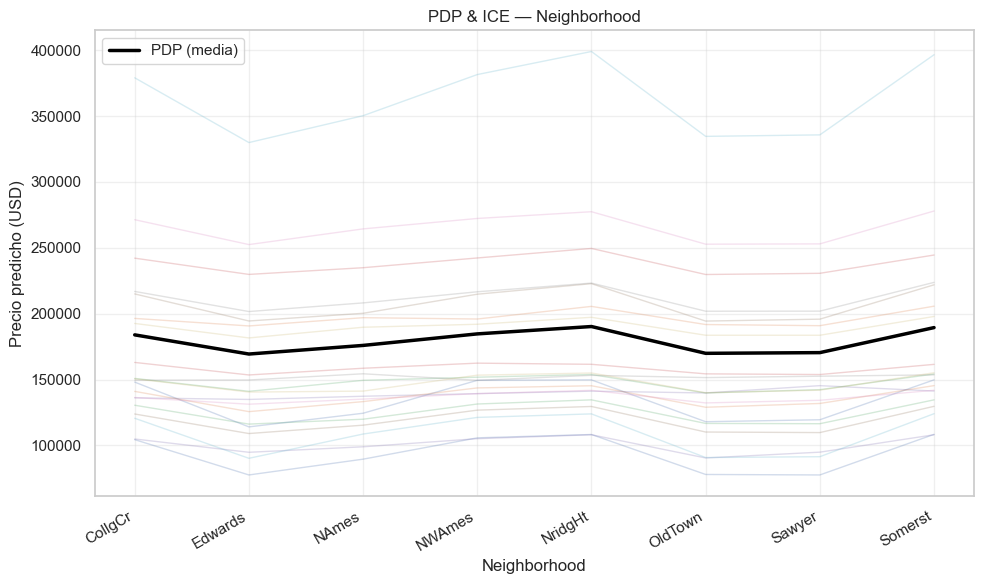

Figura guardada en: ../reports/figures\pdp_ice_Neighborhood.png


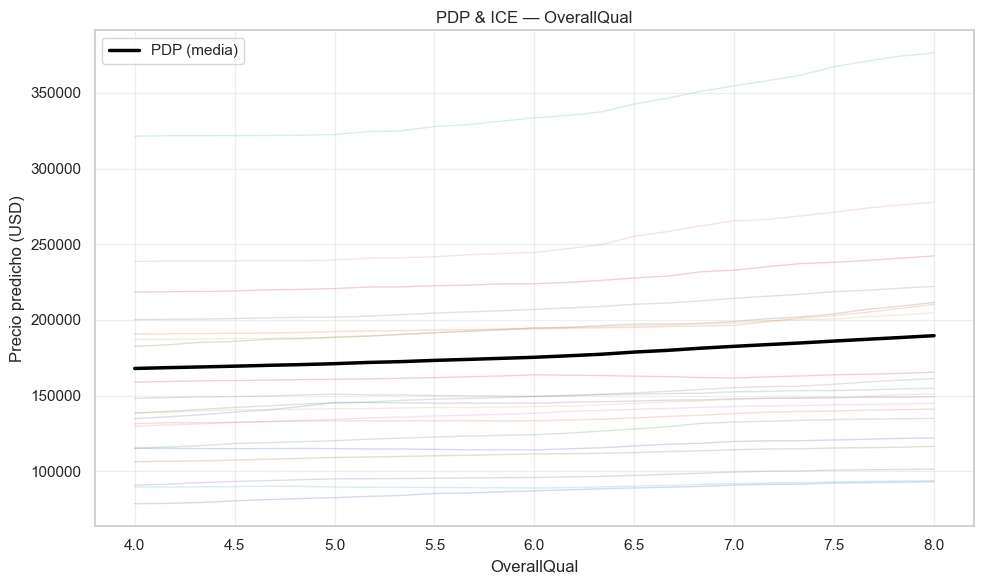

Figura guardada en: ../reports/figures\pdp_ice_OverallQual.png


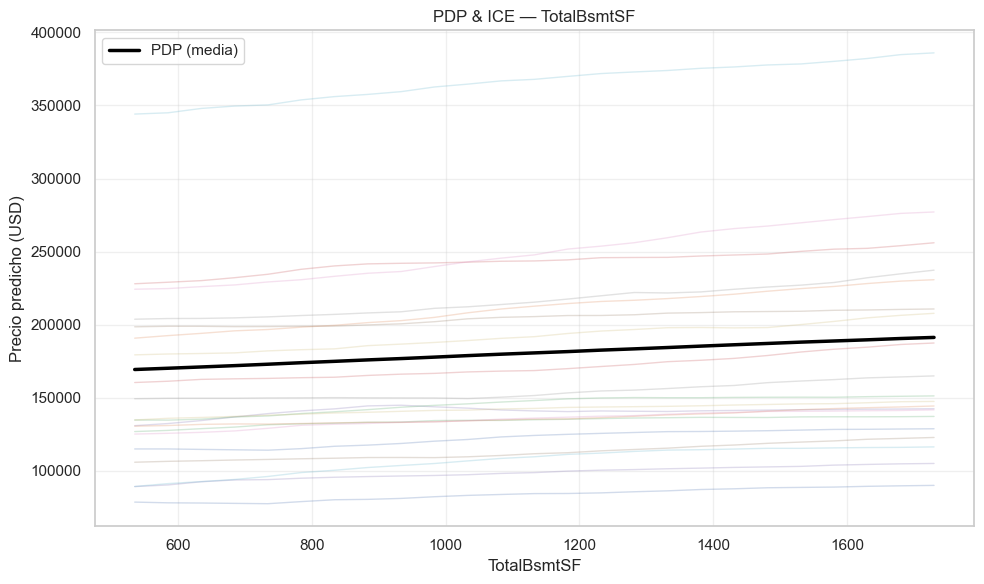

Figura guardada en: ../reports/figures\pdp_ice_TotalBsmtSF.png


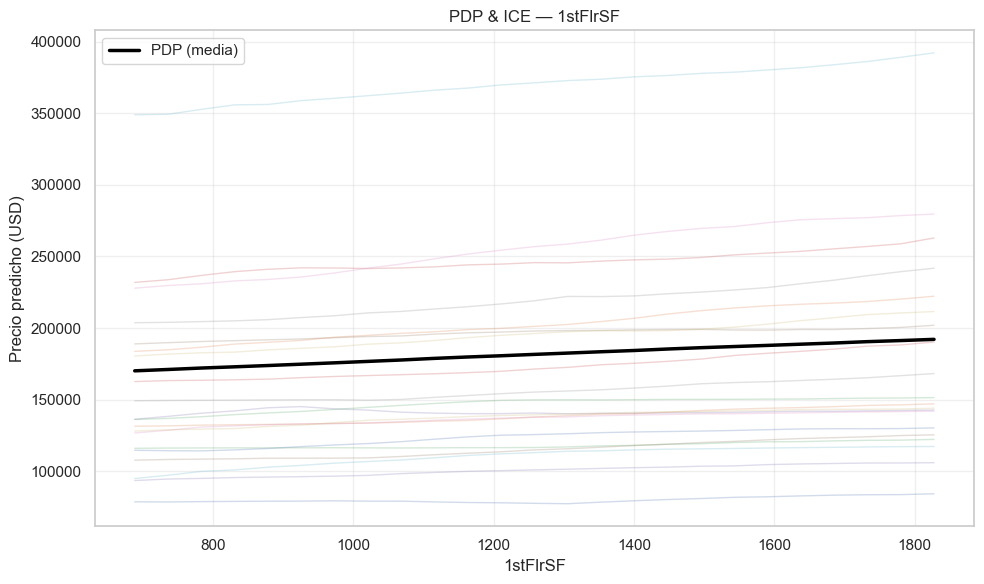

Figura guardada en: ../reports/figures\pdp_ice_1stFlrSF.png
Resumen PDP/ICE guardado en: ../reports/data\pdp_ice_summary.json

8.2 completado en 8.6s.


In [22]:
# =========================
# 8.2 PDP & ICE (USD, con smearing)
# =========================
import os
import json
import time
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# -----------------------------
# 0) Rutas y configuración
# -----------------------------
MODEL_PATH = '../models/best_model.joblib'
TRAIN_PATH = '../data/raw/train.csv'
OOF_CSV_PATH = '../reports/data/oof_predictions_benchmark.csv'
PI_CSV_PATH  = '../reports/data/permutation_importance_holdout.csv'

FIG_DIR  = '../reports/figures'
DATA_DIR = '../reports/data'
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

BEST_MODEL_NAME = 'ExtraTrees'   # Alinear con el mejor del benchmark

# Si quieres forzar manualmente las variables a graficar, pon aquí una lista;
# si lo dejas en None, usará el CSV de PI (si existe) o caerá a un conjunto por defecto.
FEATURES_TO_PLOT = None  # p.ej.: ['Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF']

# Densidad del grid para numéricas y tope de categorías para categóricas
GRID_POINTS_NUM = 25
MAX_CATS = 8

# Muestras para el fondo del PDP y nº de curvas ICE
PDP_BG_FRACTION = 0.30
ICE_N = 20

# Semilla
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# -----------------------------
# 1) Carga de artefactos y datos
# -----------------------------
t0 = time.time()
final_model = joblib.load(MODEL_PATH)

df = pd.read_csv(TRAIN_PATH)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop(columns=['SalePrice'])
y_log = np.log1p(df['SalePrice'])

print("Modelo y datos cargados.")

# -----------------------------
# 2) Factor de smearing (global)
#    - intenta a partir del OOF para el mejor modelo
#    - fallback 1.0 si no se puede estimar
# -----------------------------
def compute_smearing_from_oof(oof_df, model_name):
    # Prioridad 1: usar y_log y oof_log_model para smearing = mean(exp(y_log - oof))
    # Prioridad 2: si ya hay columna de predicción en USD, puede calcularse indirectamente (no necesario aquí)
    col_log = f'oof_log_{model_name}'
    if 'y_log' in oof_df.columns and col_log in oof_df.columns:
        resid = oof_df['y_log'] - oof_df[col_log]
        return float(np.exp(resid).mean())
    return 1.0

smearing = 1.0
if os.path.exists(OOF_CSV_PATH):
    try:
        oof_df = pd.read_csv(OOF_CSV_PATH)
        smearing = compute_smearing_from_oof(oof_df, BEST_MODEL_NAME)
        src = 'oof'
    except Exception:
        smearing = 1.0
        src = 'fallback(1.0)'
else:
    smearing = 1.0
    src = 'fallback(1.0)'

print(f"Factor de smearing = {smearing:.6f} (fuente: {src})")

# -----------------------------
# 3) Selección de variables a graficar
# -----------------------------
if FEATURES_TO_PLOT is None:
    feats = None
    if os.path.exists(PI_CSV_PATH):
        try:
            pi_df = pd.read_csv(PI_CSV_PATH)
            # Espera columnas: 'feature', 'importance_mean'
            feats = (pi_df.sort_values('importance_mean', ascending=False)
                          .head(4)['feature']
                          .tolist())
        except Exception:
            feats = None

    if feats is None:
        # Fallback curado a mano: 2 continuas + 1 ordinal + 1 categórica
        candidate_list = [c for c in ['Neighborhood','OverallQual','TotalBsmtSF','1stFlrSF']
                          if c in X.columns]
        if len(candidate_list) == 0:
            # último fallback: primeras 4 columnas
            candidate_list = X.columns[:4].tolist()
        FEATURES_TO_PLOT = candidate_list
    else:
        FEATURES_TO_PLOT = feats

print("Variables seleccionadas para PDP/ICE:", FEATURES_TO_PLOT)

# -----------------------------
# 4) Conjuntos para PDP/ICE
#    - Fondo (PDP): muestreo estratificado para rapidez
#    - ICE: pocas instancias (20) para no saturar
# -----------------------------
X_bg, _ybg = train_test_split(
    X, test_size=(1.0 - PDP_BG_FRACTION), random_state=RANDOM_STATE,
    stratify=pd.qcut(y_log, q=10, labels=False, duplicates='drop')
)
# Submuestreo ICE: 20 instancias (o menos si no hay tantas)
ICE_N = min(ICE_N, len(X_bg))
X_ice = X_bg.sample(n=ICE_N, random_state=RANDOM_STATE)

print(f"Background PDP: {len(X_bg)} filas | Muestras ICE: {len(X_ice)}")

# -----------------------------
# 5) Funciones auxiliares: predicción en USD, PDP e ICE vectorizados
# -----------------------------
def predict_usd(model, X_df):
    """
    Predicción en USD a partir del pipeline final que devuelve log1p(y).
    Inversión: y_hat = exp(ŷ_log) * smearing - 1
    """
    y_pred_log = model.predict(X_df)
    y_pred_usd = (np.exp(y_pred_log) * smearing) - 1.0
    return np.asarray(y_pred_usd).ravel()

def build_grid_for_feature(X_df, feature_name, n_points=GRID_POINTS_NUM, max_cats=MAX_CATS):
    s = X_df[feature_name]
    if pd.api.types.is_numeric_dtype(s):
        lo, hi = s.quantile([0.05, 0.95])
        if not np.isfinite(lo) or not np.isfinite(hi) or lo == hi:
            lo, hi = s.min(), s.max()
        if lo == hi:
            # todo constante: un solo punto
            grid = np.array([lo])
        else:
            grid = np.linspace(lo, hi, n_points)
    else:
        cats = s.astype('object').value_counts().index.tolist()
        grid = np.array(cats[:min(len(cats), max_cats)], dtype=object)
    return grid

def pdp_curve(feature_name, X_background, grid):
    """
    PDP vectorizado: sustituye la columna por cada punto del grid y promedia predicciones.
    Devuelve: grid_values, pdp_means (USD)
    """
    blocks = []
    for v in grid:
        Xb = X_background.copy()
        Xb[feature_name] = v
        Xb["_pdp_value_"] = v
        blocks.append(Xb)
    X_big = pd.concat(blocks, ignore_index=True)

    y_usd_big = predict_usd(final_model, X_big)
    df_big = pd.DataFrame({
        "_pdp_value_": X_big["_pdp_value_"].values,
        "_pred_usd_": y_usd_big
    })
    agg = df_big.groupby("_pdp_value_")["_pred_usd_"].mean()
    grid_out = np.array(agg.index.tolist(), dtype=object)
    pdp_vals = agg.values
    return grid_out, pdp_vals

def ice_curves(feature_name, X_instances, grid):
    """
    ICE vectorizado: para cada fila, genera todas las variantes del grid y predice en bloque.
    Devuelve: matriz (n_instancias x n_grid) en USD.
    """
    all_curves = []
    for i in range(len(X_instances)):
        row = X_instances.iloc[[i]].copy()
        X_rep = pd.concat([row]*len(grid), ignore_index=True)
        X_rep[feature_name] = grid
        y_usd = predict_usd(final_model, X_rep)          # -> (n_grid,)
        y_usd = np.asarray(y_usd).ravel().astype(float)  # escalar por punto
        all_curves.append(y_usd)
    return np.vstack(all_curves)

# -----------------------------
# 6) Cálculo y gráficas por variable
# -----------------------------
PDP_SUMMARY = []

for feat in FEATURES_TO_PLOT:
    if feat not in X.columns:
        print(f"[AVISO] '{feat}' no está en X; se omite.")
        continue

    # Grid y curvas
    grid = build_grid_for_feature(X_bg, feat, n_points=GRID_POINTS_NUM, max_cats=MAX_CATS)
    grid_vals, pdp_vals = pdp_curve(feat, X_bg, grid)
    ice_mat = ice_curves(feat, X_ice, grid_vals)

    # Resumen de “elasticidad” aproximada: variación relativa entre extremos del PDP
    if pd.api.types.is_numeric_dtype(X_bg[feat]):
        if len(pdp_vals) >= 2 and pdp_vals[0] > 0:
            rel_change = (pdp_vals[-1] - pdp_vals[0]) / pdp_vals[0]
        else:
            rel_change = np.nan
        PDP_SUMMARY.append({
            'feature': feat,
            'grid_lo': float(grid_vals[0]) if len(grid_vals)>0 and np.isscalar(grid_vals[0]) else str(grid_vals[0]),
            'grid_hi': float(grid_vals[-1]) if len(grid_vals)>0 and np.isscalar(grid_vals[-1]) else str(grid_vals[-1]),
            'pdp_lo_usd': float(pdp_vals[0]) if len(pdp_vals)>0 else np.nan,
            'pdp_hi_usd': float(pdp_vals[-1]) if len(pdp_vals)>0 else np.nan,
            'approx_relative_change': float(rel_change) if np.isfinite(rel_change) else np.nan
        })
    else:
        PDP_SUMMARY.append({
            'feature': feat,
            'categories_plotted': list(map(lambda x: x if isinstance(x, (str,int,float)) else str(x), grid_vals)),
            'pdp_mean_usd_min': float(np.nanmin(pdp_vals)) if len(pdp_vals)>0 else np.nan,
            'pdp_mean_usd_max': float(np.nanmax(pdp_vals)) if len(pdp_vals)>0 else np.nan
        })

    # ---------------- Plot ----------------
    plt.figure(figsize=(10, 6))
    # ICE (muchas líneas tenues)
    for i in range(ice_mat.shape[0]):
        plt.plot(grid_vals, ice_mat[i, :], alpha=0.25, linewidth=1)

    # PDP (línea gruesa)
    plt.plot(grid_vals, pdp_vals, linewidth=2.5, label='PDP (media)', color='black')

    plt.title(f'PDP & ICE — {feat}')
    plt.ylabel('Precio predicho (USD)')
    plt.xlabel(feat)
    if not pd.api.types.is_numeric_dtype(X_bg[feat]):
        plt.xticks(rotation=30, ha='right')
    plt.grid(alpha=0.3)
    plt.legend(loc='best')
    out_path = os.path.join(FIG_DIR, f"pdp_ice_{feat}.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
    print(f"Figura guardada en: {out_path}")

# -----------------------------
# 7) Guardar resumen numérico
# -----------------------------
summary_path = os.path.join(DATA_DIR, "pdp_ice_summary.json")
with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(PDP_SUMMARY, f, ensure_ascii=False, indent=2)
print(f"Resumen PDP/ICE guardado en: {summary_path}")

print(f"\n8.2 completado en {time.time()-t0:.1f}s.")


### 8.2. Efectos parciales (PDP) e individuales (ICE) — Conclusiones

#### Contexto
- **Muestra:** fondo estratificado de 438 observaciones (30%).  
- **ICE:** 20 trayectorias.  
- **Corrección:** retrotransformación a USD con *smearing* (factor 1.0097).  
- **Variables analizadas:** *Neighborhood*, *OverallQual*, *TotalBsmtSF* y *1stFlrSF*.  

---

#### Hallazgos principales

1. **Neighborhood (categórica) — efecto dominante y no lineal**  
   - PDP: diferencias claras entre barrios → *NridgHt* y *Somerst* concentran precios más altos, *Edwards* y *OldTown* por debajo de la media.  
   - ICE: gran dispersión entre categorías → el cambio de vecindario no afecta a todas las viviendas en paralelo (*ceteris paribus*).  
   - Implicación: el componente locacional es un determinante estructural y sus efectos dependen de interacciones con calidad, superficie o antigüedad.  

2. **OverallQual — relación monótona y estable**  
   - PDP: relación creciente y suave en el rango [4–8].  
   - ICE: curvas casi paralelas ⇒ efecto consistente y baja heterogeneidad condicional.  
   - Interpretación: subir un punto en calidad global se asocia con un incremento medio apreciable del precio.  

3. **TotalBsmtSF y 1stFlrSF — primas de tamaño lineales**  
   - PDP: pendientes positivas casi lineales en 500–1.700 ft².  
   - ICE: paralelismo razonable ⇒ elasticidades estables.  
   - Conclusión: los aumentos de superficie generan incrementos casi proporcionales en el precio, sin umbrales ni saturaciones fuertes en el rango observado.  

---

#### Estabilidad y riesgo de extrapolación
- Proximidad entre PDP e ICE en *OverallQual* y superficies → bajo riesgo de efectos espurios por interacciones no modeladas.  
- En *Neighborhood*, abanico ICE más abierto → efecto locacional depende del perfil del inmueble.  
- Recomendación: interpretar el PDP de *Neighborhood* como promedio condicional, no como prima fija universal.  

---

#### Implicaciones para negocio y modelado
- **Localización y calidad** = palancas de valor robustas → deben ponderarse prioritariamente en pricing y tasación.  
- **Primas por superficie** = estables → útiles para reglas rápidas de valoración (ajustes por m²/ft²).  
- **Heterogeneidad por vecindario** → recomendable segmentar diagnósticos y métricas por zona para controlar sesgos y estabilidad (ya previsto en análisis por segmentos).  

---

#### Limitaciones y control de calidad
- Los PDP/ICE se calcularon sobre una muestra de fondo; aunque estratificada, no sustituyen el análisis completo en todo el espacio de covariables.  
- En *Neighborhood* solo se graficaron algunas categorías → conviene rotar categorías o repetir PDP por subconjuntos.  
- Los efectos son *ceteris paribus*: cambios simultáneos grandes (ej. calidad + superficie) pueden generar respuestas distintas a las marginales.  

---

### 8.3. Diagnóstico de errores por segmentos

Una vez interpretados los efectos marginales de las variables clave (Sección 8.2), el siguiente paso es evaluar si el modelo presenta **sesgos sistemáticos en distintos subgrupos del mercado**.  

Este diagnóstico es esencial para garantizar **equidad, estabilidad y utilidad operativa** del modelo en producción.

---

#### Aspectos analizados

1. **Distribución de residuos**  
   - Histograma y QQ-plot para detectar asimetrías, colas pesadas u *outliers*.  
   - Permite comprobar la validez del supuesto de normalidad aproximada de los errores.  

2. **Rendimiento por cuartiles de precio**  
   - Métricas: **MdAE** y **MdAPE** por cuartil.  
   - Objetivo: identificar heteroscedasticidad (errores relativos mayores en inmuebles baratos o caros).  

3. **Rendimiento por vecindario**  
   - Cálculo de MdAE por barrio.  
   - Ranking de *Top* (mejor desempeño) y *Bottom* (peor desempeño).  
   - Ayuda a descubrir posibles **sesgos geográficos**.  

4. **Calibración global**  
   - Gráfico predicho vs. real (línea de 45°).  
   - Control rápido de subvaloración o sobrevaloración sistemática.  

---

#### Metodología
- Se trabajará exclusivamente con los **artefactos generados en el benchmark**:  
  - Predicciones **OOF** (out-of-fold).  
  - Métricas precomputadas.  
- No es necesario recomputar el entrenamiento → eficiencia y reproducibilidad garantizadas.  

---


Modelo seleccionado para diagnóstico: ExtraTrees


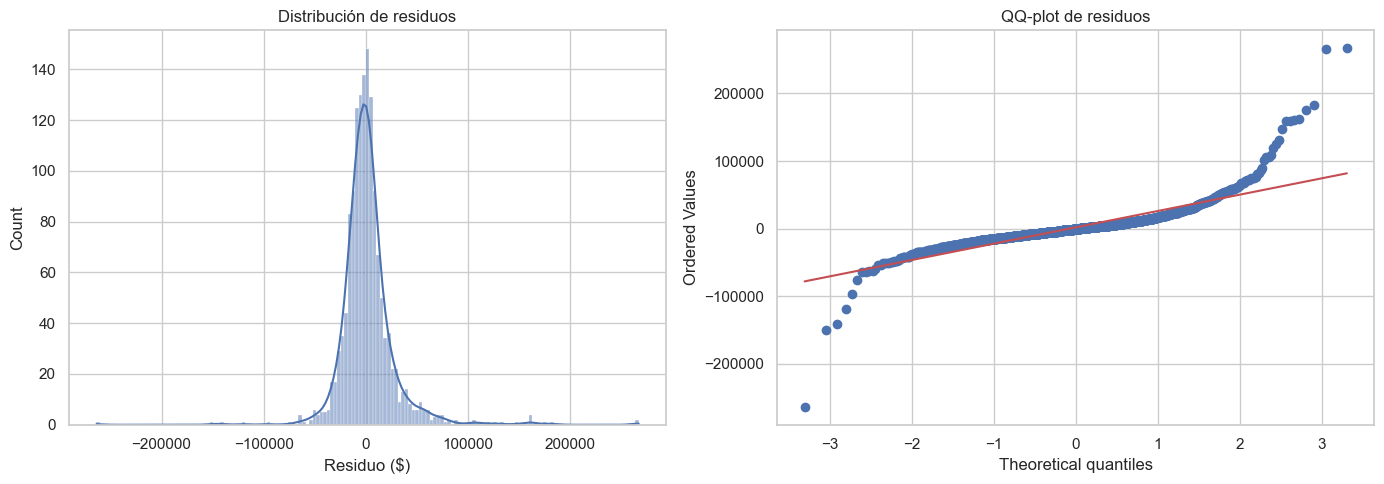

Resumen residuos → skewness=1.798, kurtosis(exceso)=23.938


C:\Users\ruben\AppData\Local\Temp\ipykernel_24008\4127539460.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_q = errs.groupby(quartiles)


AttributeError: 'SeriesGroupBy' object has no attribute 'abs'

In [24]:
# 8.3 Diagnóstico de errores por segmentos (versión robusta)
# ----------------------------------------------------------
import os, json, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

OOF_CSV_PATH       = '../reports/data/oof_predictions_benchmark.csv'
METRICS_JSON_PATH  = '../reports/data/benchmark_metrics.json'
TRAIN_PATH         = '../data/raw/train.csv'
FIG_DIR            = '../reports/figures'
DATA_OUT_DIR       = '../reports/data'
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_OUT_DIR, exist_ok=True)

# ---------- Utilidades ----------
def _try_load_metrics_best_model(path):
    """Devuelve el nombre del mejor modelo según rmse_log si el JSON es legible;
    si no, devuelve None. Acepta dict, string-JSON o lista de dicts."""
    if not os.path.exists(path):
        print(f"Aviso: no existe {path}")
        return None
    try:
        with open(path, 'r', encoding='utf-8') as f:
            obj = json.load(f)
        # Si vino como string JSON dentro de JSON:
        if isinstance(obj, str):
            try:
                obj = json.loads(obj)
            except Exception:
                return None
        # Caso 1: dict {model: {rmse_log: ...}}
        if isinstance(obj, dict):
            cand = []
            for k, v in obj.items():
                if isinstance(v, dict) and 'rmse_log' in v:
                    cand.append((k, float(v['rmse_log'])))
            if cand:
                return min(cand, key=lambda t: t[1])[0]
        # Caso 2: lista de dicts [{'model':'ExtraTrees','rmse_log':...}, ...]
        if isinstance(obj, list):
            cand = []
            for row in obj:
                if isinstance(row, dict) and 'model' in row and 'rmse_log' in row:
                    cand.append((row['model'], float(row['rmse_log'])))
            if cand:
                return min(cand, key=lambda t: t[1])[0]
    except Exception as e:
        print(f"Aviso: no se pudo leer {path}: {e}")
    return None

def _ensure_eur_predictions(oof_df):
    """Si no hay columnas oof_eur_*, pero hay oof_log_* + y_log + fold_id,
    reconstruye USD aplicando smearing por fold y añade columnas oof_eur_*."""
    eur_cols = [c for c in oof_df.columns if re.match(r'^oof_(eur|usd)_.+', c)]
    if eur_cols:
        # Normalizamos nombre: tratamos 'usd' como 'eur' para el resto del flujo
        for c in [c for c in oof_df.columns if c.startswith('oof_usd_')]:
            oof_df['oof_eur_' + c.replace('oof_usd_', '')] = oof_df[c]
        if 'y_usd' in oof_df and 'y_eur' not in oof_df:
            oof_df['y_eur'] = oof_df['y_usd']
        return oof_df

    log_cols = [c for c in oof_df.columns if c.startswith('oof_log_')]
    if log_cols and {'y_log', 'fold_id'}.issubset(oof_df.columns):
        print("No se encontraron columnas oof_eur_*. Reconstruyendo a partir de oof_log_* con smearing por fold...")
        y_log = oof_df['y_log'].astype(float)
        fold_id = oof_df['fold_id'].astype(int)
        # y_true en USD
        oof_df['y_eur'] = np.expm1(y_log)
        for lc in log_cols:
            pred_log = oof_df[lc].astype(float)
            resid_log = y_log - pred_log
            sf_by_fold = np.exp(resid_log).groupby(fold_id).mean()
            y_pred_eur = np.exp(pred_log) * sf_by_fold.loc[fold_id].values - 1.0
            name = 'oof_eur_' + lc.replace('oof_log_', '')
            oof_df[name] = y_pred_eur
        # Persistimos de vuelta por conveniencia
        try:
            oof_df.to_csv(OOF_CSV_PATH, index=False)
            print(f"OOF actualizado con columnas oof_eur_* guardado en: {OOF_CSV_PATH}")
        except Exception as e:
            print(f"Aviso: no se pudo reescribir el OOF: {e}")
        return oof_df

    # Si llegamos aquí, no podemos continuar
    raise RuntimeError(
        "No hay columnas 'oof_eur_*' ni es posible reconstruirlas (faltan 'oof_log_*' o 'y_log'/'fold_id')."
        " Revisa el artefacto OOF generado por el benchmark."
    )

# ---------- Carga artefactos ----------
oof = pd.read_csv(OOF_CSV_PATH)
df  = pd.read_csv(TRAIN_PATH)
if 'Id' in df: df = df.drop(columns='Id')

# Asegurar columnas en USD a partir de log si hace falta
oof = _ensure_eur_predictions(oof)

# Determinar mejor modelo
best_model = _try_load_metrics_best_model(METRICS_JSON_PATH)

if best_model is None:
    # fallback por MAE usando las columnas disponibles
    cand_cols = [c for c in oof.columns if c.startswith('oof_eur_')]
    if not cand_cols:
        raise RuntimeError("No se encuentran columnas 'oof_eur_*' en el OOF; no es posible continuar.")
    maes = {c.replace('oof_eur_', ''): np.mean(np.abs(oof['y_eur'] - oof[c])) for c in cand_cols}
    best_model = min(maes, key=maes.get)

print(f"Modelo seleccionado para diagnóstico: {best_model}")

# ---------- DataFrame de errores ----------
y_true = oof['y_eur'].astype(float)
y_pred = oof[f'oof_eur_{best_model}'].astype(float)

errs = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'residual': y_true - y_pred,
    'abs_err': np.abs(y_true - y_pred),
    'pct_err': np.where(y_true > 0, (y_true - y_pred) / y_true, np.nan)
})

if 'fold_id' in oof:
    errs['fold_id'] = oof['fold_id'].values
if 'Neighborhood' in df.columns and len(df) == len(errs):
    errs['Neighborhood'] = df['Neighborhood'].values

# ---------- 1) Distribución de residuos y QQ-plot ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(errs['residual'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de residuos')
axes[0].set_xlabel('Residuo ($)')

stats.probplot(errs['residual'], dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot de residuos')
plt.tight_layout()
resid_fig_path = os.path.join(FIG_DIR, 'residuals_hist_qq.png')
plt.savefig(resid_fig_path, dpi=120)
plt.show()

skew = stats.skew(errs['residual'], nan_policy='omit')
kurt = stats.kurtosis(errs['residual'], fisher=True, nan_policy='omit')
print(f"Resumen residuos → skewness={skew:.3f}, kurtosis(exceso)={kurt:.3f}")

# ---------- 2) Rendimiento por cuartiles de precio ----------
quartiles = pd.qcut(errs['y_true'], q=4, labels=['Q1 (Bajo)','Q2','Q3','Q4 (Alto)'])
grp_q = errs.groupby(quartiles)
by_quartile = pd.DataFrame({
    'n': grp_q.size(),
    'MdAE_$': grp_q['abs_err'].median().round(2),
    'MdAPE_%': (grp_q['pct_err'].abs().median() * 100).round(2)
}).reset_index().rename(columns={'y_true':'price_quartile'})

print("\nRendimiento por cuartil de precio (MdAE/MdAPE):")
print(by_quartile)

plt.figure(figsize=(8,5))
sns.boxplot(x=quartiles, y=errs['abs_err'], showfliers=False)
plt.ylabel('Error absoluto ($)')
plt.xlabel('Cuartil de precio')
plt.title('Error absoluto por cuartil de precio')
plt.tight_layout()
box_quart_path = os.path.join(FIG_DIR, 'abs_error_by_quartile.png')
plt.savefig(box_quart_path, dpi=120)
plt.show()

by_quartile.to_csv(os.path.join(DATA_OUT_DIR, 'errors_by_quartile.csv'), index=False)

# ---------- 3) Rendimiento por vecindario ----------
if 'Neighborhood' in errs.columns:
    grp_nb = errs.groupby('Neighborhood')
    by_nb = pd.DataFrame({
        'n': grp_nb.size(),
        'MdAE_$': grp_nb['abs_err'].median().round(2),
        'MdAPE_%': (grp_nb['pct_err'].abs().median() * 100).round(2)
    }).sort_values('MdAE_$').reset_index()

    print("\nTop 10 vecindarios con menor MdAE ($):")
    print(by_nb.head(10))

    print("\nBottom 10 vecindarios con mayor MdAE ($):")
    print(by_nb.tail(10).sort_values('MdAE_$', ascending=False))

    by_nb.to_csv(os.path.join(DATA_OUT_DIR, 'errors_by_neighborhood.csv'), index=False)

    top15 = by_nb.head(15)['Neighborhood'].tolist()
    bot15 = by_nb.tail(15)['Neighborhood'].tolist()
    subset = errs[errs['Neighborhood'].isin(top15 + bot15)]
    plt.figure(figsize=(12,6))
    order = top15 + bot15[::-1]
    sns.boxplot(data=subset, x='Neighborhood', y='abs_err', order=order, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Error absoluto ($)')
    plt.title('Error por vecindario (Top 15 vs Bottom 15)')
    plt.tight_layout()
    box_nb_path = os.path.join(FIG_DIR, 'abs_error_by_neighborhood_top_bottom.png')
    plt.savefig(box_nb_path, dpi=120)
    plt.show()

# ---------- 4) Calibración global ----------
plt.figure(figsize=(6,6))
sns.scatterplot(x=errs['y_true'], y=errs['y_pred'], alpha=0.5, s=20)
lims = [errs[['y_true','y_pred']].min().min(), errs[['y_true','y_pred']].max().max()]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel('Real ($)')
plt.ylabel('Predicho ($)')
plt.title('Calibración global: predicho vs. real')
plt.tight_layout()
calib_path = os.path.join(FIG_DIR, 'y_true_vs_y_pred.png')
plt.savefig(calib_path, dpi=120)
plt.show()

# ---------- 5) Resumen ----------
overall_mae   = errs['abs_err'].mean()
overall_mdAE  = errs['abs_err'].median()
overall_mdAPE = (errs['pct_err'].abs().median() * 100)

print("\nResumen global de errores:")
print(f"  MAE   = ${overall_mae:,.0f}")
print(f"  MdAE  = ${overall_mdAE:,.0f}")
print(f"  MdAPE = {overall_mdAPE:.2f}%")

print("\nFiguras guardadas en:")
print(f"  • {resid_fig_path}")
print(f"  • {box_quart_path}")
if 'Neighborhood' in errs.columns:
    print(f"  • {box_nb_path}")
print(f"  • {calib_path}")

print("\nTablas guardadas en:")
print(f"  • {os.path.join(DATA_OUT_DIR, 'errors_by_quartile.csv')}")
if 'Neighborhood' in errs.columns:
    print(f"  • {os.path.join(DATA_OUT_DIR, 'errors_by_neighborhood.csv')}")
